#### **Import needed liberaries**

In [283]:
import pandas as pd
import numpy as np 
from infoo import infoo
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\omarh\Desktop\as-ai-2\insurance(in).csv")


#### **Read the insurance dataset**

In [285]:
df


,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## 1- undestanding the data

### **Display the first 15 rows and the last 10 rows** 

In [286]:
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Write your observations and interpretation for each feature based on your understanding of the dataset.

- the age can be solit into groups in a new col 
- the gender will be a category col
- the bmi can be solit into groups in a new col  
- the childern col will be a category
- the region col will be a categry
- the charges 

### **Check data types and the number of uniquees for each column** 

In [287]:
df.dtypes

age           int64
gender       object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [288]:
df.nunique()

age           47
gender         2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [289]:
df.loc[ : ,df.nunique() < 10].count()

gender      1338
children    1338
smoker      1338
region      1338
dtype: int64

### **check nulls**

In [290]:
df.notnull().sum()

age         1338
gender      1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

- so there is not ay null row in the database

### **cheack for duplicates**

In [291]:
df.duplicated().sum()

np.int64(1)

- there is one duplicaten row

### **Show me which rows are duplicated (select the original and the duplicated ) and drop these duplicated rows**

In [292]:
duplicates = df[df.duplicated(keep=False)]
print(duplicates)

     age gender    bmi  children smoker     region    charges
195   19   male  30.59         0     no  northwest  1639.5631
581   19   male  30.59         0     no  northwest  1639.5631


In [293]:
df.drop_duplicates(inplace=True)

In [294]:
df.duplicated().sum()

np.int64(0)

- the duplicated row now is deleted

### **Fix the data types for each column**

In [295]:
df.nunique()

age           47
gender         2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [296]:
df.dtypes

age           int64
gender       object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [297]:
cat_cols=df.loc[: ,df.nunique() <10 ].columns
df[cat_cols]=df[cat_cols].astype("category")

- we fixed the data type for each col so we can work on them

### **Statistical Summary**

In [298]:
infoo(df)

,num_of_nulls,num_of_unique,data_type,count_of_notnull,perc_of_nulls
age,0,47,int64,1337,0.0
gender,0,2,category,1337,0.0
bmi,0,548,float64,1337,0.0
children,0,6,category,1337,0.0
smoker,0,2,category,1337,0.0
region,0,4,category,1337,0.0
charges,0,1337,float64,1337,0.0


In [299]:
df.describe()

,age,bmi,charges
count,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,13279.121487
std,14.044333,6.100468,12110.359656
min,18.000000,15.960000,1121.873900
25%,27.000000,26.290000,4746.344000
50%,39.000000,30.400000,9386.161300
75%,51.000000,34.700000,16657.717450
max,64.000000,53.130000,63770.428010


#### **Univariate Analysis**
##### 1-with continous columns

##### **Age Column**


- What is the data type of the `age` column?
- What is the minimum, maximum, mean, median and (0.25,0.25 ) quartiles of age?

In [300]:
df["age"].dtype

dtype('int64')

In [301]:
df["age"].describe()

count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

- How is the distribution of age values? (histogram / KDE plot) using matplotlib.pyplot  and seaborn


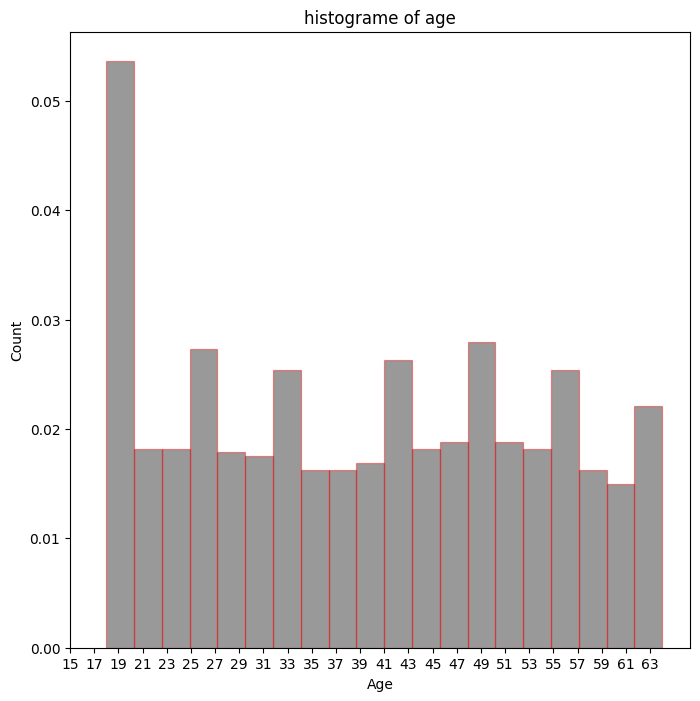

In [302]:
#     histogram by plt: ---------------------


plt.figure(figsize=(8,8))
plt.hist(x=df["age"],bins=20,color="black",edgecolor="red",linewidth=.9,alpha=.4,density=True)
plt.xlabel("Age")
plt.ylabel("Count")
plt.xticks(range(15,65,2))
# plt.yticks(range(0,180,10))
plt.title("histograme of age")
plt.show()
# -----------------


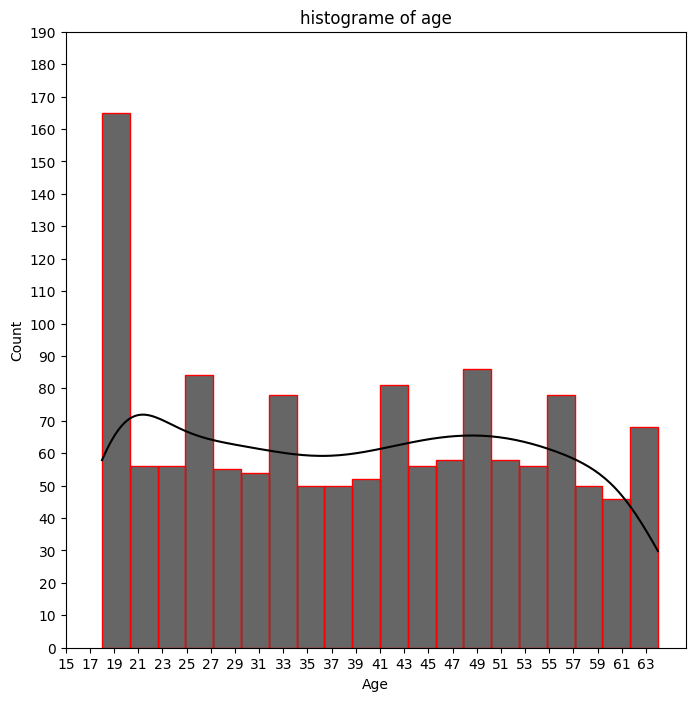

In [303]:
#     histogram by seaborn: ---------------------




plt.figure(figsize=(8,8))
sns.histplot(data=df,x="age",bins=20,color="black",edgecolor="red",kde=True,alpha=.6)
plt.xlabel("Age")
plt.ylabel("Count")
plt.xticks(range(15,65,2))
plt.yticks(range(0,200,10))
plt.title("histograme of age")
plt.show()
# -----------------


<Axes: xlabel='age', ylabel='Density'>

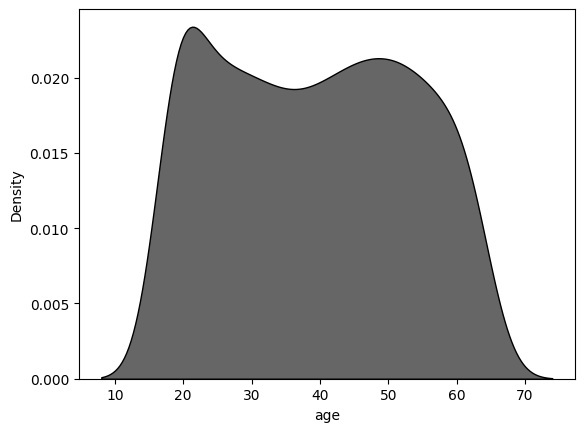

In [304]:
#     kdeplot by seaborn: ---------------------


sns.kdeplot(data=df,x="age",fill=True,color="black",alpha=.6)

- Are there any unusual or extreme values (outliers) in age? (box plot and IQR algorithm)


C:\Users\omarh\AppData\Local\Temp\ipykernel_30860\2072163113.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="age", palette="grey", width=0.5)


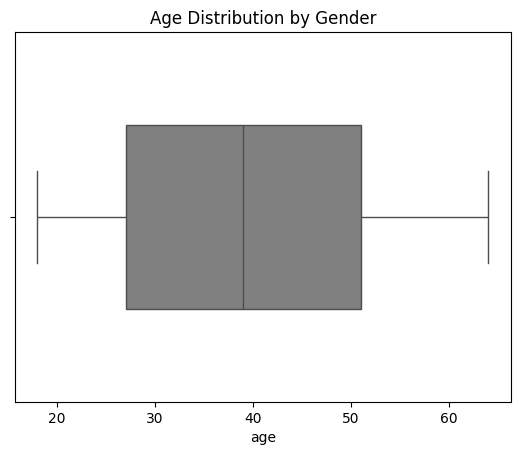

In [305]:
sns.boxplot(data=df, x="age", palette="grey", width=0.5)
plt.title("Age Distribution by Gender")
plt.show()


- How many unique ages exist in the dataset?
- Which age group appears most frequently?
- Can you categorize age into groups (young, middle-aged, senior) and count how many records fall into each group?


In [306]:
df["age"].nunique()

47

In [307]:
def age_classify(x):
    if 10 <x < 30 :
        return "young"
    elif 29 < x < 45 :
        return "midile"
    else:
        return "senior"

In [308]:
df["age_groups"] = df["age"].apply(age_classify)

In [309]:
df["age_groups"].value_counts()

age_groups
senior    529
young     416
midile    392
Name: count, dtype: int64

C:\Users\omarh\AppData\Local\Temp\ipykernel_30860\1164855831.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="age_groups",palette="grey")


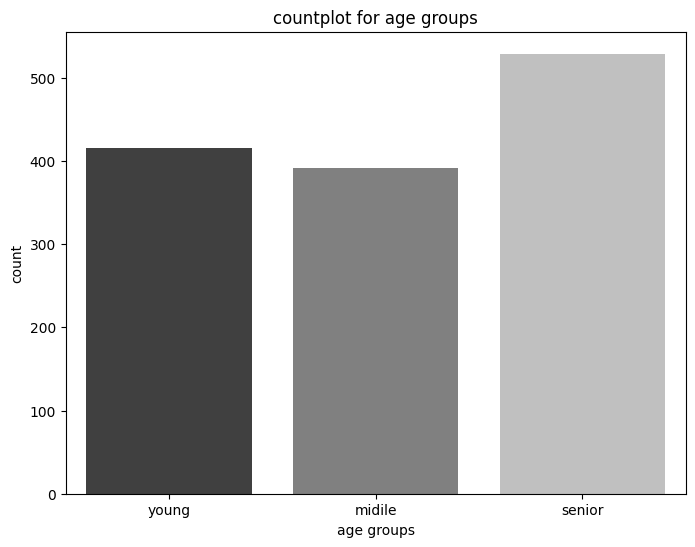

In [310]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x="age_groups",palette="grey")
plt.xlabel("age groups")
plt.ylabel("count")
plt.title("countplot for age groups")
plt.show()

### **Univariate Analysis on `bmi` Column**

- What is the data type of the `bmi` column?
- What is the minimum, maximum, mean, median and (0.25, 0.75) quartiles of bmi?

In [311]:
df["bmi"].dtype

dtype('float64')

In [312]:
df["bmi"].describe()

count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64

- How is the distribution of bmi values? (histogram / KDE plot) using matplotlib.pyplot and seaborn


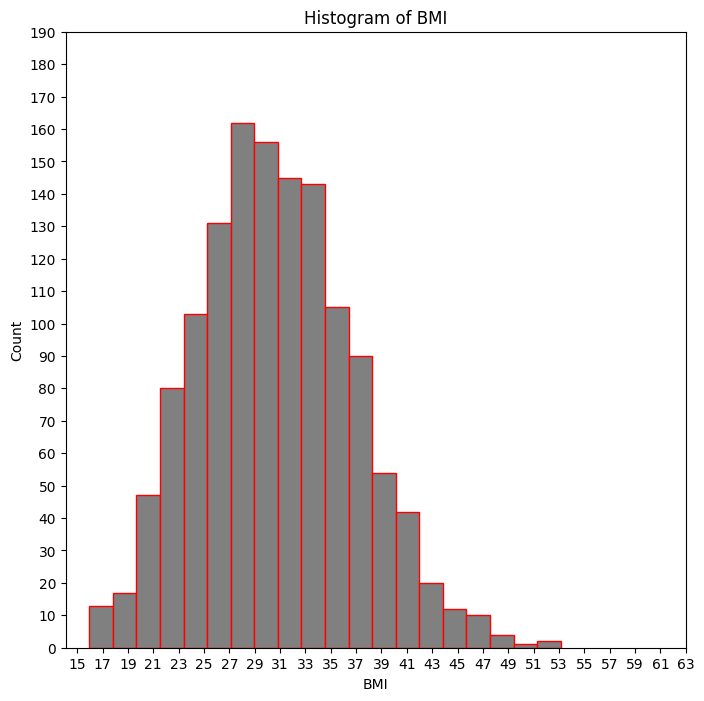

In [313]:
plt.figure(figsize=(8,8))
plt.hist(df["bmi"], bins=20, edgecolor="red",color="grey")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.xticks(range(15,65,2))
plt.yticks(range(0,200,10))
plt.title("Histogram of BMI")
plt.show()


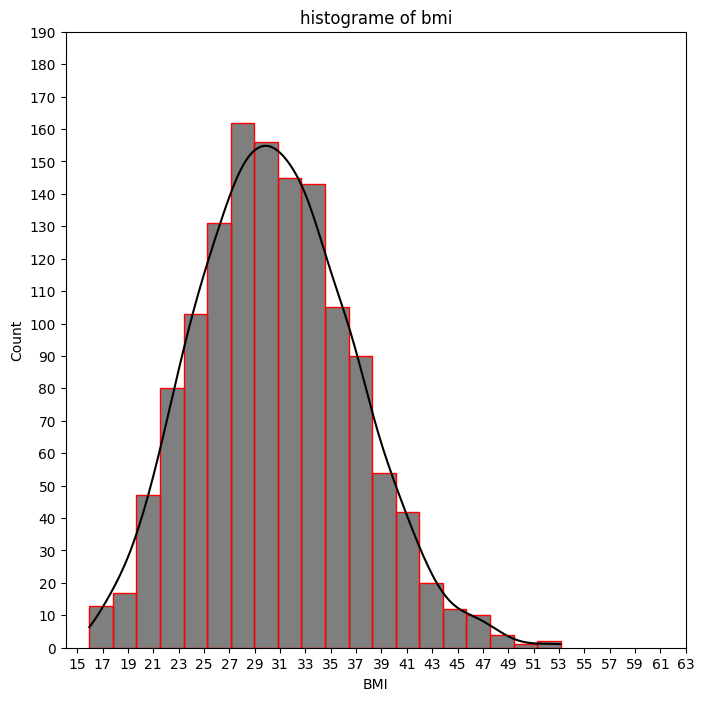

In [314]:
#     histogram by seaborn: ---------------------




plt.figure(figsize=(8,8))
sns.histplot(data=df,x="bmi",bins=20,edgecolor="red",kde=True,color="black",alpha=.5)
plt.xlabel("BMI")
plt.ylabel("Count")
plt.xticks(range(15,65,2))
plt.yticks(range(0,200,10))
plt.title("histograme of bmi")
plt.show()
# -----------------


<Axes: xlabel='bmi', ylabel='Density'>

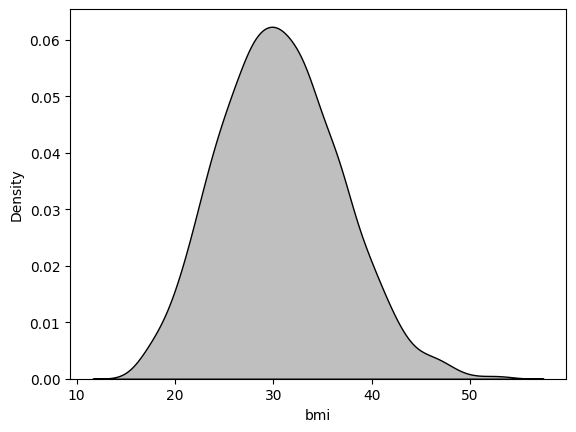

In [315]:
#     kdeplot by seaborn: ---------------------


sns.kdeplot(data=df,x="bmi",fill=True,color="black")

<Axes: xlabel='bmi'>

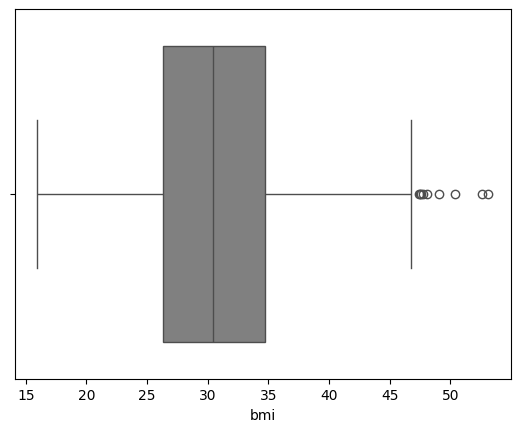

In [316]:
sns.boxplot(data=df,x="bmi" , color="grey")

- Are there any unusual or extreme values (outliers) in bmi? (box plot and IQR algorithm)

<Axes: xlabel='bmi'>

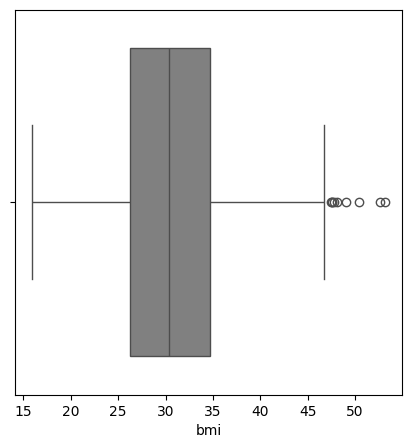

In [317]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df,x="bmi",color="grey")

- so there is many outlierrs in the bmi data

In [318]:
Q1 = df["bmi"].quantile(.25)
Q3 = df["bmi"].quantile(.75)

IQR = Q3 -Q1
L_F = Q1 - 1.5*IQR
U_F = Q3 + 1.5*IQR

print(L_F , " " , U_F)

13.674999999999994   47.31500000000001


In [319]:
df["bmi"] = df["bmi"].clip(L_F,U_F)

In [320]:
df_bmioutliers = df.loc[(df["bmi"]  >  U_F) | (df["bmi"] < L_F) , :]

- Which bmi value appears most frequently?
- Can you categorize bmi into groups (e.g., underweight, normal, overweight, obese) and count how many records fall into each group?

In [321]:
def bmi_cat(x):
    if x < 19 :
        return "underwieght"
    elif 18 < x <25 :
        return "normal"
    elif 24 < x < 30 :
        return "overwieghted"
    else  :
        return "obese"
    
df["bmi_groups"] = df["bmi"].apply(bmi_cat)

In [322]:
df["bmi_groups"].value_counts()

bmi_groups
obese           706
overwieghted    386
normal          221
underwieght      24
Name: count, dtype: int64

- so the most one is the obes

In [324]:
(df["bmi_groups"].value_counts() / len(df)) * 100


bmi_groups
obese           52.804787
overwieghted    28.870606
normal          16.529544
underwieght      1.795064
Name: count, dtype: float64

- so the most apper bmi is the obese one with 52.8% of the database

C:\Users\omarh\AppData\Local\Temp\ipykernel_30860\1217187187.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="bmi_groups",palette="grey")


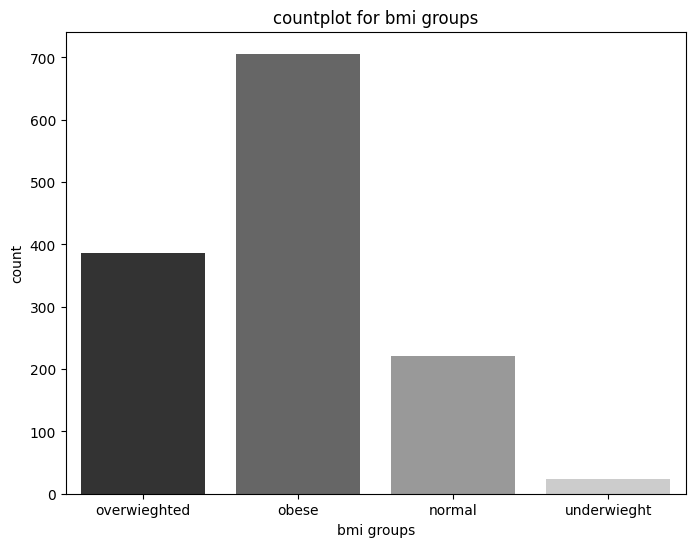

In [421]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x="bmi_groups",palette="grey")
plt.xlabel("bmi groups")
plt.ylabel("count")
plt.title("countplot for bmi groups")
plt.show()

### **Univariate Analysis on `charges` Column**

- What is the data type of the `charges` column?
- What is the minimum, maximum, mean, median and (0.25, 0.75) quartiles of charges?

In [325]:
df["charges"].dtype

dtype('float64')

In [326]:
df["charges"].describe()

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

- How is the distribution of charges values? (histogram / KDE plot) using matplotlib.pyplot and seaborn

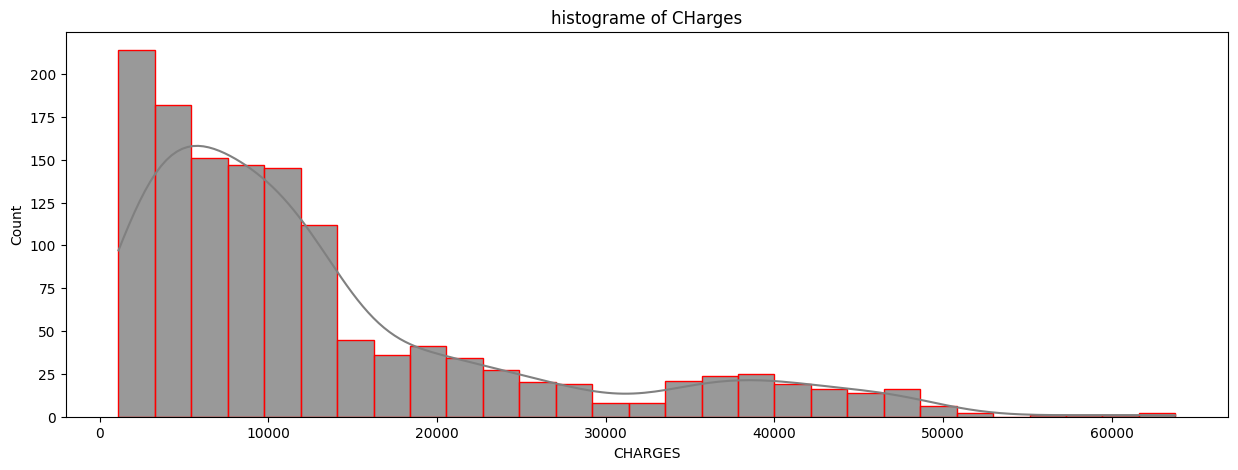

In [430]:
plt.figure(figsize=(15,5))
sns.histplot(data=df , x="charges",edgecolor="red",kde=True,color="grey",alpha=.8,stat="count")
plt.xlabel("CHARGES")
plt.ylabel("Count")
# plt.xticks(range(15,65,2))
# plt.yticks(range(0,180,10))
plt.title("histograme of CHarges")
plt.show()

<Axes: xlabel='charges', ylabel='Density'>

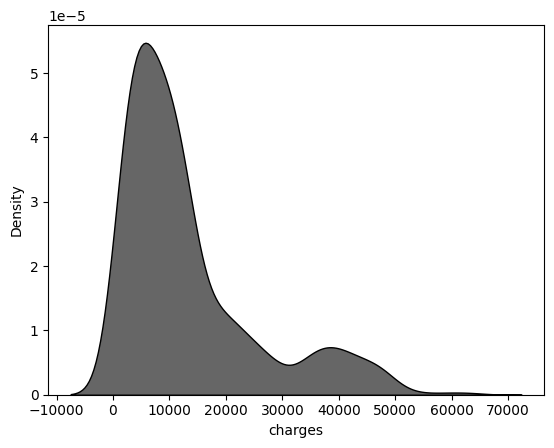

In [428]:
sns.kdeplot(data=df,x="charges",fill=True,color="black",alpha=.6)

- Are there any unusual or extreme values (outliers) in charges? (box plot and IQR algorithm)


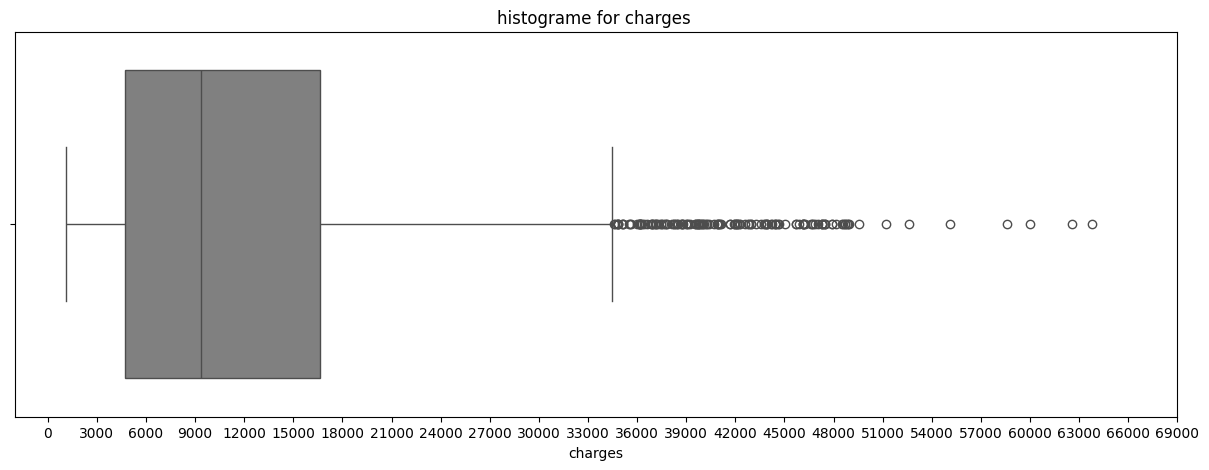

In [429]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df,x="charges",color="grey")
plt.xlabel("charges")
plt.xticks(range(0,70000,3000))
plt.title("histograme for charges ")
plt.show()

In [431]:
Q1=df["charges"].quantile(.25)
Q3=df["charges"].quantile(.75)
IQR=Q3 - Q1
L_F=Q1 - 1.5*IQR
U_F = Q3 + 1.5 * IQR
print(L_F , "  " , U_F)

-13120.716174999998    34524.777625


In [432]:
charges_outliers=df.loc[ (df["charges"] > U_F) | (df["charges"] < L_F) ,: ]

### **Univariate Analysis on `sex` Column**

- What is the data type of the `sex` column?
- How many unique categories are there in `sex`?

In [331]:
df["gender"].dtype

CategoricalDtype(categories=['female', 'male'], ordered=False, categories_dtype=object)

In [332]:
df["gender"].nunique()


2

In [333]:
df["gender"].value_counts()

gender
male      675
female    662
Name: count, dtype: int64

- How many records belong to each category? (value counts + bar plot + pie plot)
- Which gender is more frequent in the dataset?
- What is the percentage distribution of male vs female?

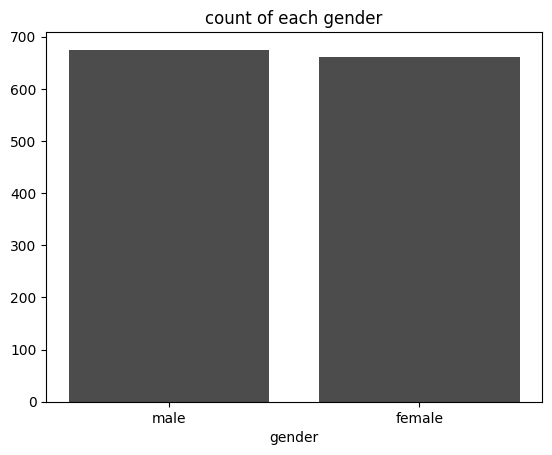

In [334]:
plt.Figure(figsize=(10,6))
plt.bar(x=df["gender"].value_counts().index,height=df["gender"].value_counts().values,color="black",alpha=.7)
plt.xlabel("gender")
plt.title("count of each gender")
plt.show()

In [335]:
gender_counts = df["gender"].value_counts()

<function matplotlib.pyplot.show(close=None, block=None)>

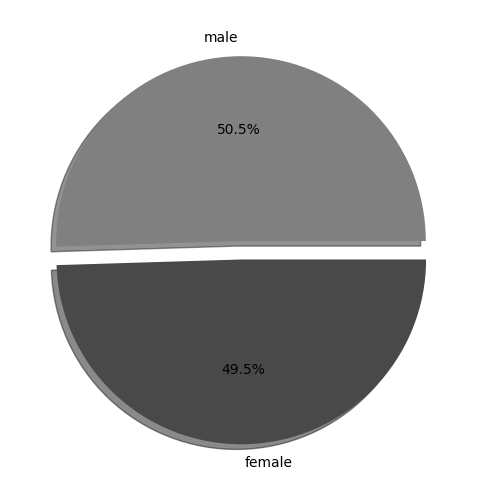

In [451]:
plt.figure(figsize=(10,6))
plt.pie(x=gender_counts.values , labels=gender_counts.index,shadow=True  , autopct="%1.1f%%" ,colors=["grey","#494949"],explode=[0,.1])

plt.show

-  so the number of each gender is clode to each other but the males have the advantege in numbers in this database

### **Univariate Analysis on `smoker` Column**

- What is the data type of the `smoker` column?
- How many unique categories are there in `smoker`?


In [337]:
df["smoker"].dtype

CategoricalDtype(categories=['no', 'yes'], ordered=False, categories_dtype=object)

In [338]:
df["smoker"].nunique()

2

In [339]:
print(df["smoker"].loc[df["smoker"]=="yes"].count())
print(df["smoker"].loc[df["smoker"]=="no"].count())

274
1063


- What percentage of the dataset are smokers?


In [456]:
df["smoker"].value_counts() / df.shape[0]*100

smoker
no     79.506358
yes    20.493642
Name: count, dtype: float64

- Does the dataset look balanced or imbalanced between smokers and non-smokers?

-                   -no it dosn't

- How many records are smokers vs non-smokers? (value counts + bar plot + pie )
- Which category is more frequent?


In [340]:
df["smoker"].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

- so the smokers is more that the non

<BarContainer object of 2 artists>

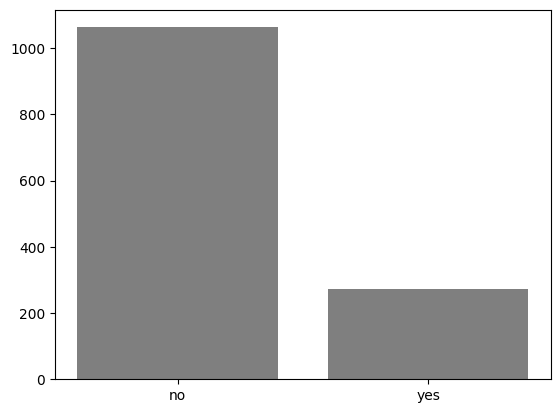

In [454]:
plt.bar(x=df["smoker"].value_counts().index , height=df["smoker"].value_counts().values , color="black", alpha = .5 )

In [342]:
smoker_counts = df["smoker"].value_counts()

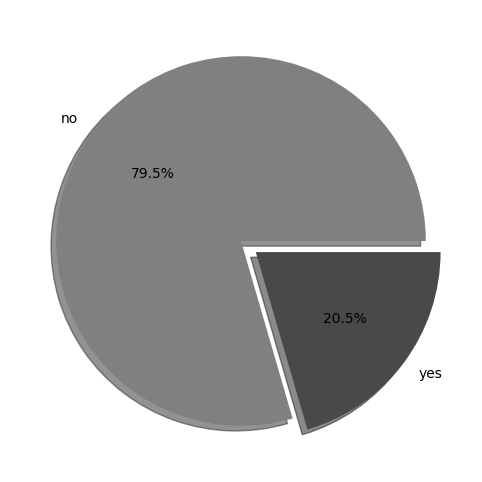

In [455]:
plt.figure(figsize=(10,6))
plt.pie(x=smoker_counts.values , labels=smoker_counts.index  ,shadow=True ,autopct="%1.1f%%" ,colors=["grey","#494949"],explode=[0,.1] )

plt.show()

### **Univariate Analysis on `region` Column**

- What is the data type of the `region` column?
- How many unique regions exist in the dataset?


In [344]:
df["region"].dtype

CategoricalDtype(categories=['northeast', 'northwest', 'southeast', 'southwest'], ordered=False, categories_dtype=object)

In [345]:
df["region"].nunique()

4

- How many records are there in each region? (counts + bar plot)
- Which region has the highest number of insured people?
- What is the percentage distribution of insured people across the 4 regions?
- Is the dataset balanced or skewed toward specific regions?

In [346]:
df["region"].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

<BarContainer object of 4 artists>

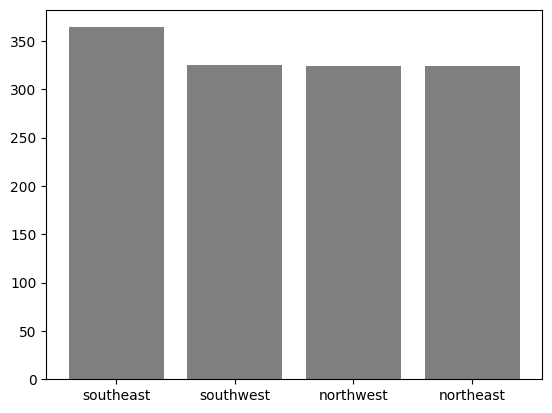

In [347]:
plt.bar(x=df["region"].value_counts().index , height=df["region"].value_counts().values , color="black", alpha = .5 )

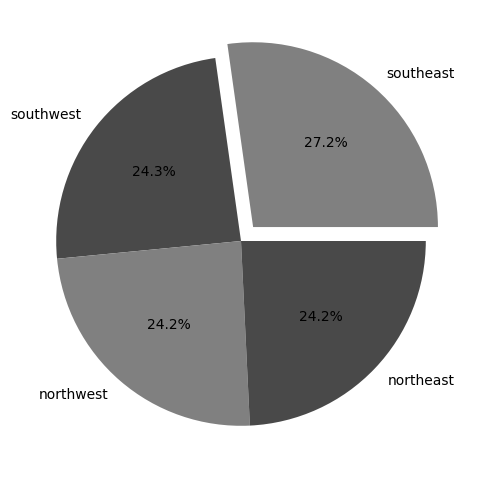

In [462]:
region_groups = df["region"].value_counts()

plt.figure(figsize=(10,6))
plt.pie(x=region_groups.values , labels=region_groups.index  , autopct="%1.1f%%" ,colors=["grey","#494949"],explode=[0.1,0,0,0])

plt.show()

### **Univariate Analysis on `children` Column**

- What is the data type of the `children` column?
- What are the unique values in `children`?
- How many insured people belong to each children category? (0,1,2,3,4,5…)
- Which children category is most frequent?
- What percentage of insured people have no children?
- Create a bar plot showing the distribution of children categories.


In [349]:
df["children"].dtype

CategoricalDtype(categories=[0, 1, 2, 3, 4, 5], ordered=False, categories_dtype=int64)

In [463]:
df["children"].value_counts()

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [350]:
df["children"].nunique()

6

C:\Users\omarh\AppData\Local\Temp\ipykernel_30860\3496973746.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="children",palette="grey")


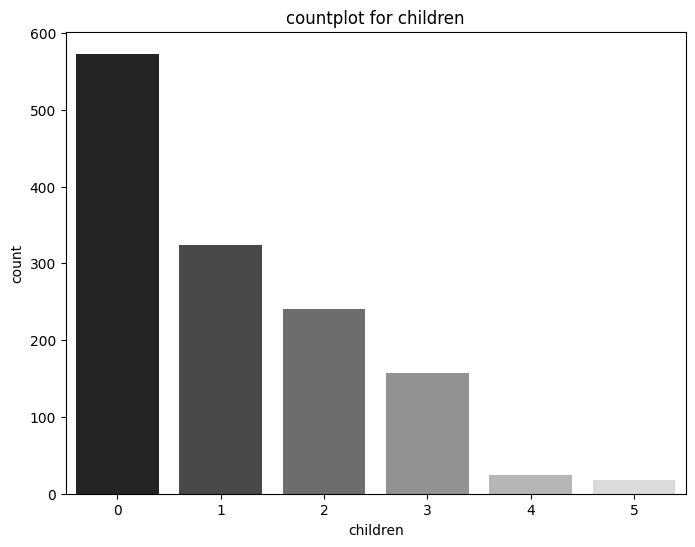

In [465]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x="children",palette="grey")
plt.xlabel("children")
plt.ylabel("count")
plt.title("countplot for children")
plt.show()

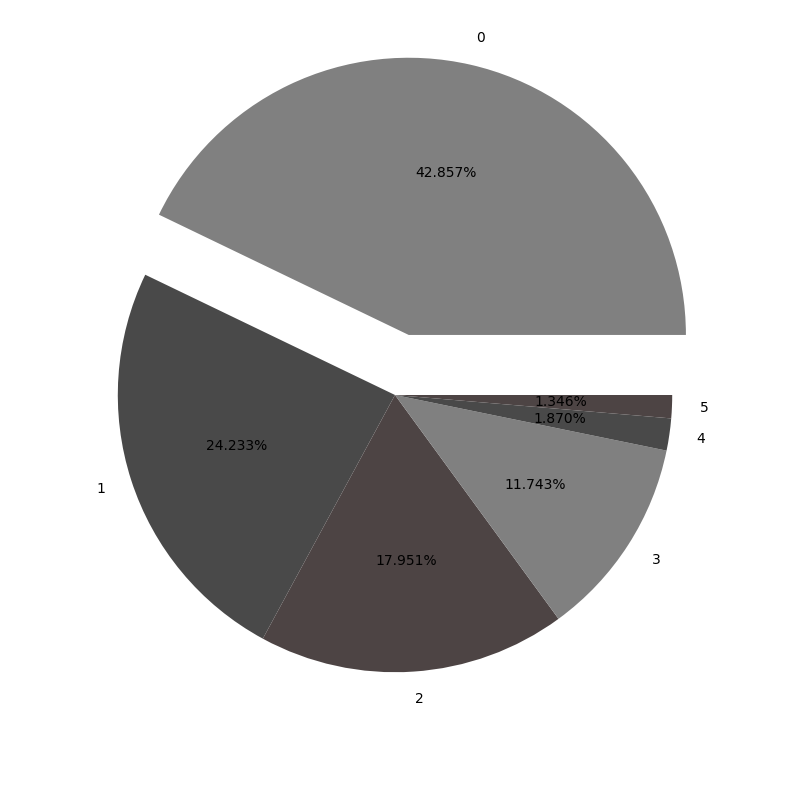

In [472]:
plt.figure(figsize=(20,10))
plt.pie(x=df["children"].value_counts().values , labels=df["children"].value_counts().index,autopct="%1.3f%%",radius=.9,explode=[0.2,0,0,0,0,0],colors=["grey","#494949","#4D4444"])
plt.show()

- most of then dosn't have any children

In [351]:
def chil_cat(x):
    if -1 <x < 2 :
        return "few"
    elif 1 < x < 4 :
        return "normal"
    else :
        return "many"

df["children_groups"] = df["children"].apply(chil_cat)

In [352]:
df["children"].unique()

[0, 1, 3, 2, 5, 4]
Categories (6, int64): [0, 1, 2, 3, 4, 5]

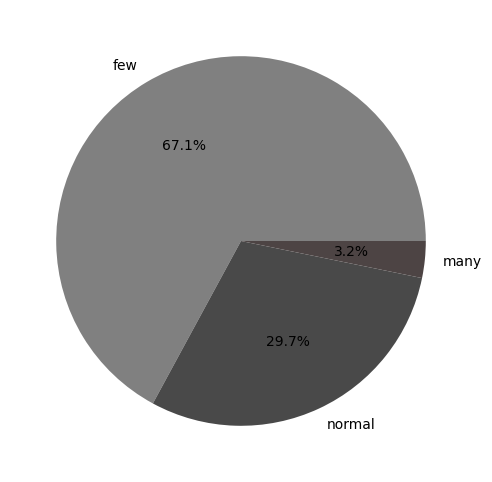

In [473]:
children_g = df["children_groups"].value_counts()

plt.figure(figsize=(10,6))
plt.pie(x=children_g.values , labels=children_g.index  , autopct="%1.1f%%",colors=["grey","#494949","#4D4444"] )

plt.show()

<BarContainer object of 3 artists>

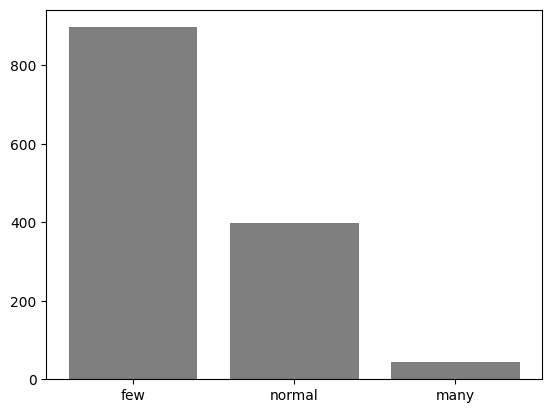

In [354]:
plt.bar(x=df["children_groups"].value_counts().index , height=df["children_groups"].value_counts().values , color="black", alpha = .5 )

---
---

### **Bivariate Analysis: age vs charges**

- Do older people tend to pay higher insurance charges?

- Create a scatter plot of age vs charges. Do you notice any trend or pattern? - Does age have a positive correlation with charges?

- What is the age distribution of people whose charges are above a certain threshold (e.g., > 20,000)?
- Among young people (e.g., age < 25), do we find high charges or are they mostly low?
- Do middle-aged groups (30–50) show a wide variation in charges compared to other groups?
- At what age range do we observe the steepest increase in charges?


In [355]:
df.groupby("age_groups")["charges"].mean()

age_groups
midile    12490.912530
senior    17070.491773
young      9200.619154
Name: charges, dtype: float64

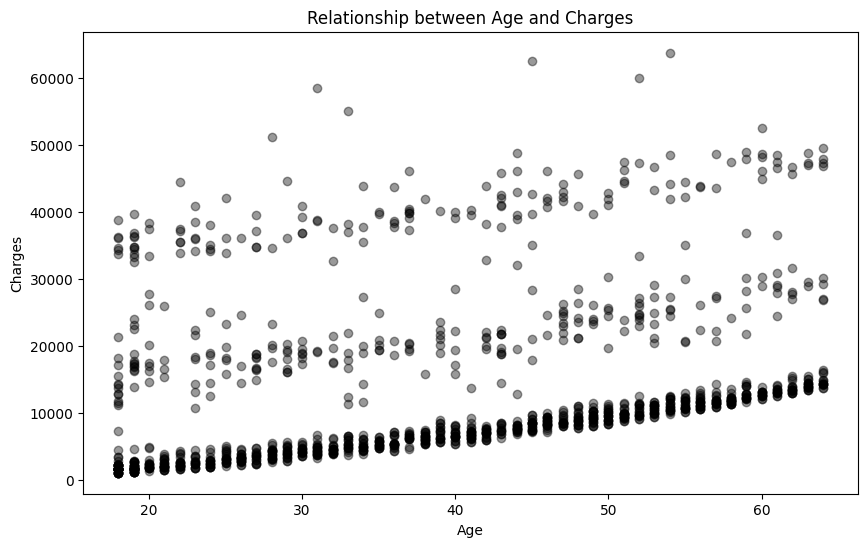

In [484]:
plt.figure(figsize=(10,6))
plt.scatter(df["age"], df["charges"], color="black", alpha=0.4)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Relationship between Age and Charges")
plt.show()


C:\Users\omarh\AppData\Local\Temp\ipykernel_30860\566839090.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x="age_groups",y="charges",palette="grey",estimator=np.mean)


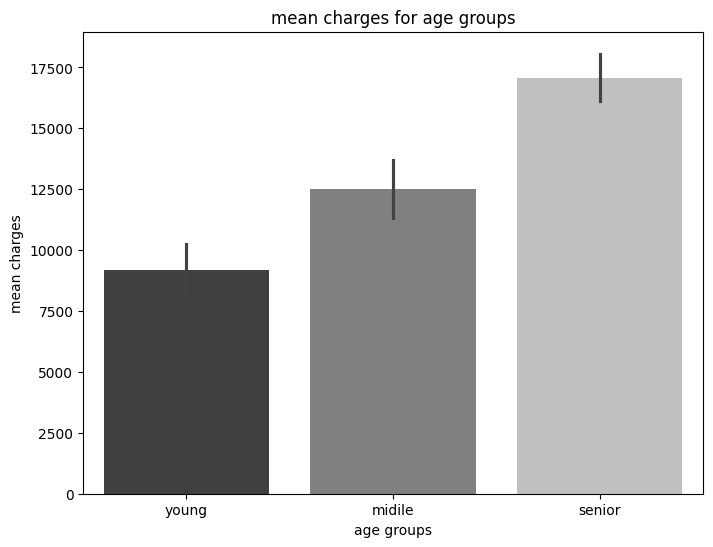

In [490]:
plt.figure(figsize=(8,6))
sns.barplot(data=df,x="age_groups",y="charges",palette="grey",estimator=np.mean)
plt.xlabel("age groups")
plt.ylabel("mean charges")
plt.title("mean charges for age groups")
plt.show()

<Axes: xlabel='age', ylabel='Count'>

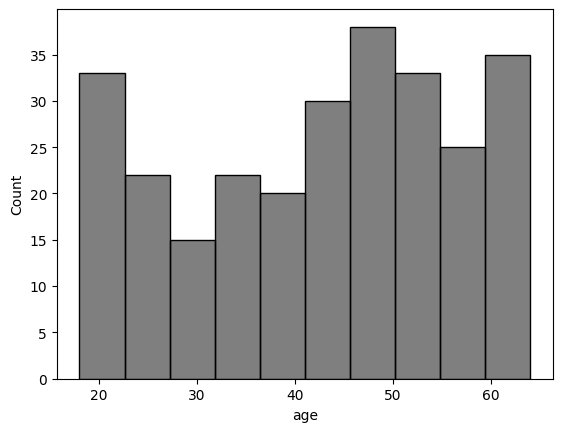

In [488]:
#  this who are have more than 20000 charges

df_upper=df.loc[df["charges"] > 20000]
sns.histplot(data=df_upper , x="age",color="black",alpha=.5)

C:\Users\omarh\AppData\Local\Temp\ipykernel_30860\3810995195.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_upper,x="age_groups",palette="grey")


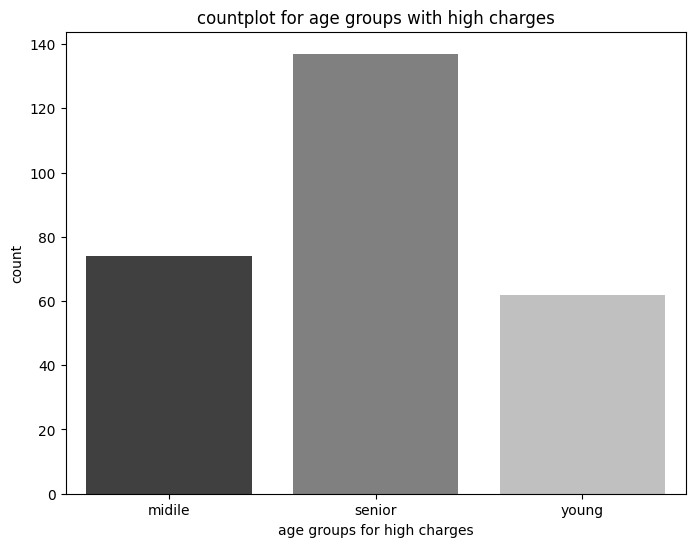

In [491]:
plt.figure(figsize=(8,6))
sns.countplot(data=df_upper,x="age_groups",palette="grey")
plt.xlabel("age groups for high charges")
plt.ylabel("count")
plt.title("countplot for age groups with high charges")
plt.show()

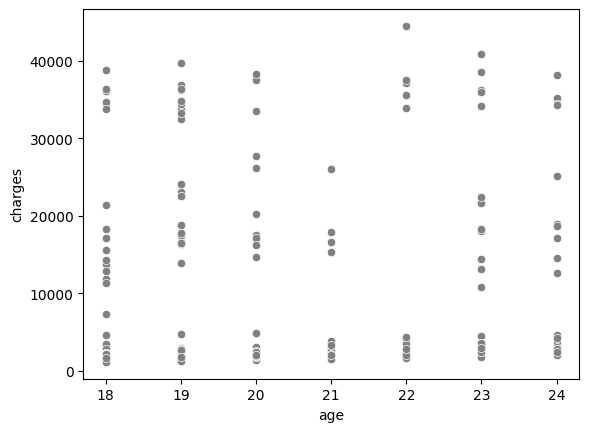

In [502]:
#  this is who cincedred as young
plt.Figure(figsize=(15,7))
df_yonges =df.loc[df["age"]<25 , :]
sns.scatterplot(data=df_yonges , x="age" , y="charges" , color="grey")
plt.show()

In [361]:
df.groupby("age_groups")["charges"].mean()

age_groups
midile    12490.912530
senior    17070.491773
young      9200.619154
Name: charges, dtype: float64

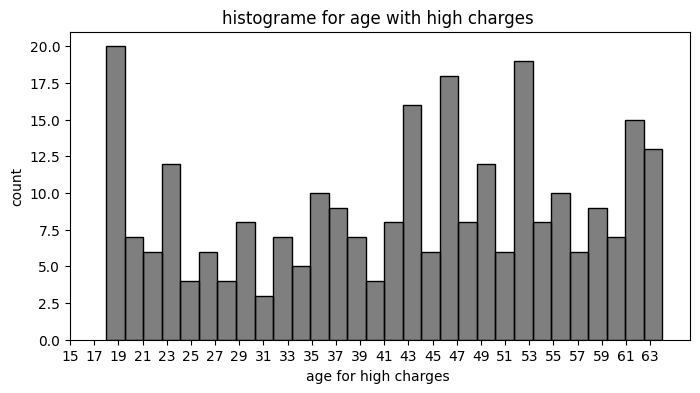

In [506]:
plt.figure(figsize=(8,4))
sns.histplot(data=df_upper,x="age",bins=30 , color="black" , alpha=.5)
plt.xlabel("age for high charges ")
plt.ylabel("count")
plt.xticks(range(15,65,2))
plt.title("histograme for age with high charges ")
plt.show()

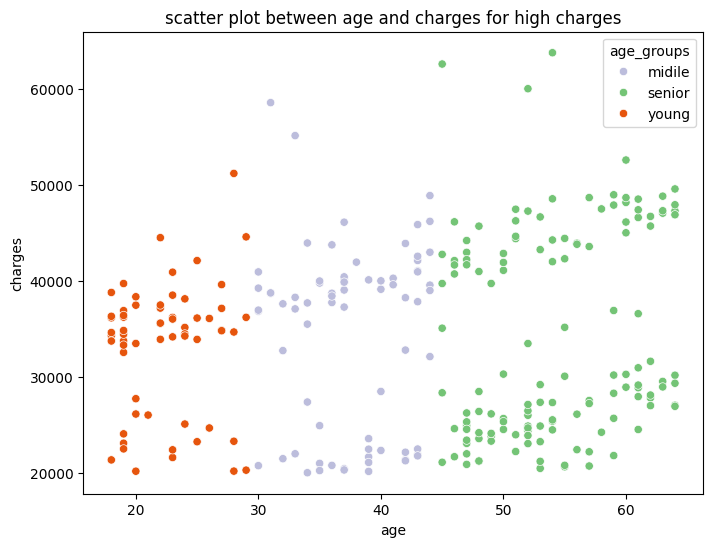

In [534]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_upper,x="age",y="charges",palette="tab20c_r",hue="age_groups")
plt.xlabel("age")
plt.ylabel("charges")
plt.title("scatter plot between age and charges for high charges")
plt.show()

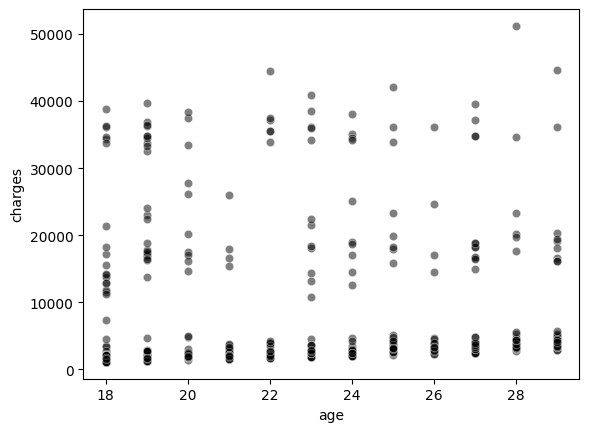

In [545]:
df_youngs=df.loc[df["age"]<30,:]
sns.scatterplot(data=df_youngs,x="age",y="charges" , color="black" , alpha = .5)
plt.show()

C:\Users\omarh\AppData\Local\Temp\ipykernel_30860\3638264221.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x="age_groups",y="charges",palette="grey",estimator=np.mean)
C:\Users\omarh\AppData\Local\Temp\ipykernel_30860\3638264221.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


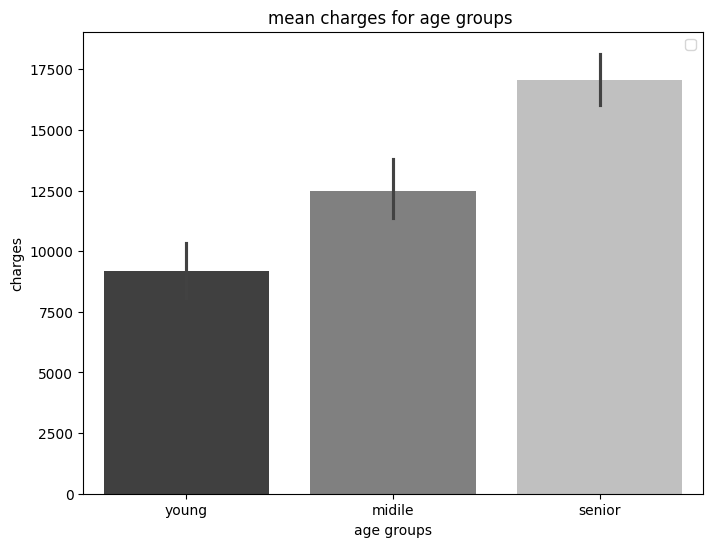

In [546]:
plt.figure(figsize=(8,6))
sns.barplot(data=df,x="age_groups",y="charges",palette="grey",estimator=np.mean)
plt.xlabel("age groups")
plt.ylabel("charges")
plt.title("mean charges for age groups ")
plt.legend()
plt.show()

C:\Users\omarh\AppData\Local\Temp\ipykernel_30860\3844500919.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x="age_groups",y="charges",palette="grey")


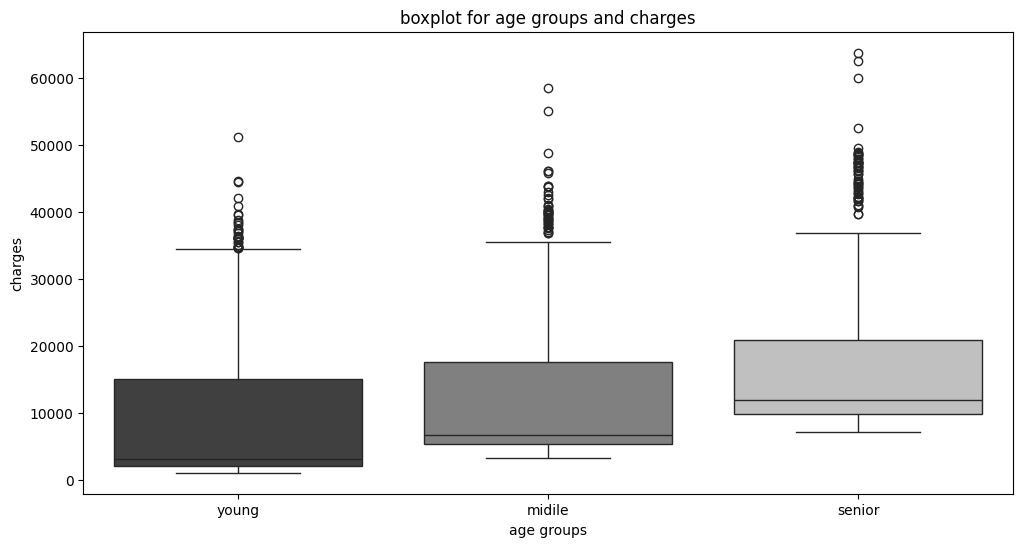

In [547]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x="age_groups",y="charges",palette="grey")
plt.xlabel("age groups")    
plt.ylabel("charges")
plt.title("boxplot for age groups and charges")
plt.show()

In [548]:
df.groupby("age_groups")["charges"].median()

age_groups
midile     6798.160625
senior    12029.286700
young      3220.371575
Name: charges, dtype: float64

In [550]:
print(df["charges"].corr(df["age"]))

0.2983082125097863


### **Bivariate Analysis: bmi vs charges**

- Does higher BMI lead to higher insurance charges?
- Is there a visible difference between low, normal, overweight, and obese categories in terms of charges?
- Create a scatter plot of bmi vs charges and comment on the relationship.
- Use box plots to compare bmi categories (e.g., underweight, normal, overweight, obese) against charges.
- What is the distribution of charges for people with very high BMI (e.g., > 35)?
- Do people with BMI < 18.5 (underweight) have lower charges compared to others?
- Which BMI range shows the widest variation in charges?
- Among people with extremely high charges (e.g., > 30,000), what BMI values are common?


In [551]:
df.groupby("bmi_groups")["charges"].mean()

bmi_groups
normal          10448.790852
obese           15572.041945
overwieghted    10987.509891
underwieght      8748.425747
Name: charges, dtype: float64

C:\Users\omarh\AppData\Local\Temp\ipykernel_30860\2007839766.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x="bmi_groups",y="charges",palette="grey",estimator=np.mean)


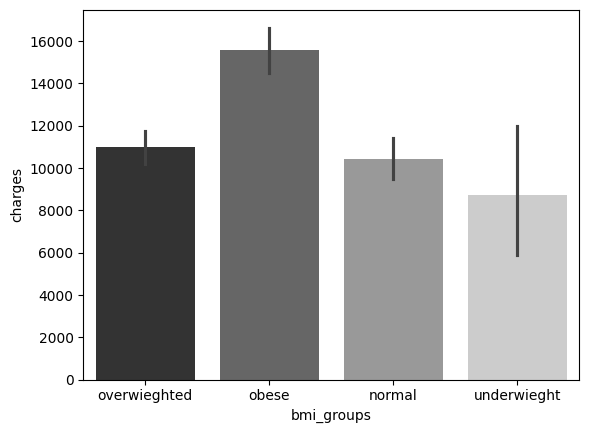

In [552]:
sns.barplot(data=df,x="bmi_groups",y="charges",palette="grey",estimator=np.mean)
plt.show()


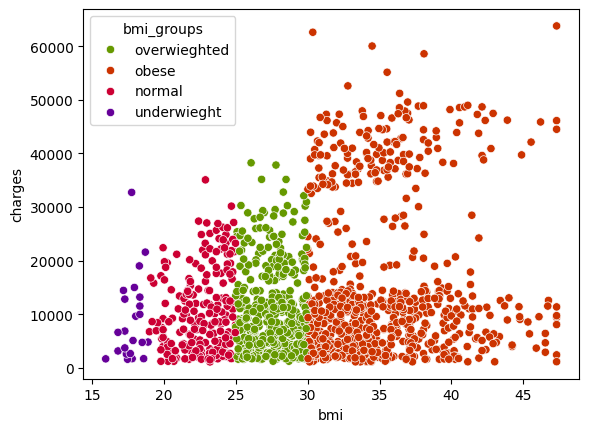

In [556]:
sns.scatterplot(data=df,x="bmi",y="charges",hue="bmi_groups",palette="brg_r")
plt.show()

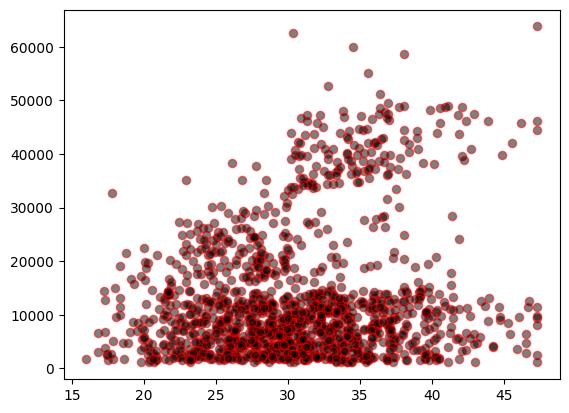

In [563]:
plt.Figure(figsize=(20,9))
plt.scatter(x=df["bmi"] , y=df["charges"] , color="black" , alpha=.5 , edgecolors="red")

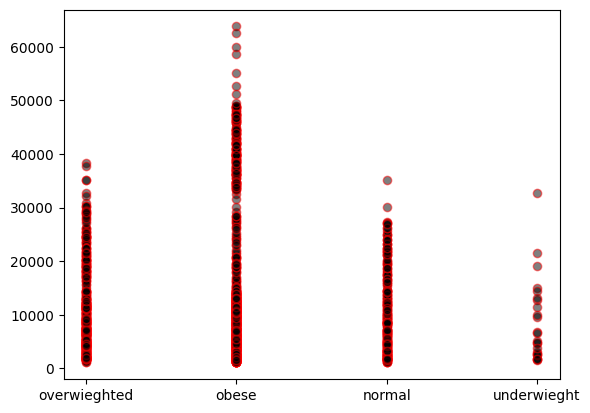

In [566]:
plt.scatter(x=df["bmi_groups"] , y=df["charges"], alpha=.5 , edgecolors="red", color="black" )

C:\Users\omarh\AppData\Local\Temp\ipykernel_30860\961098032.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="bmi_groups", y="charges", data=df , palette="grey")


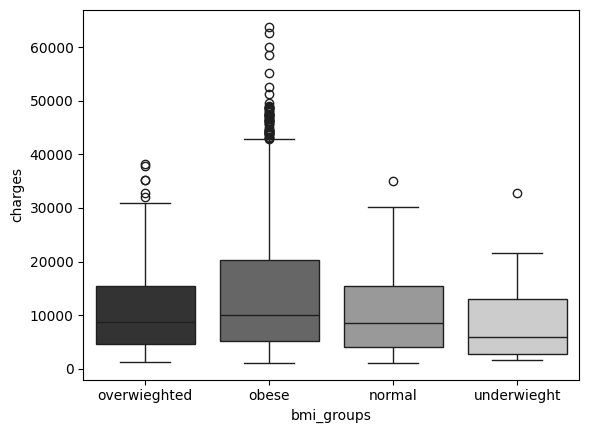

In [568]:
sns.boxplot(x="bmi_groups", y="charges", data=df , palette="grey")
plt.show()


- so it follwos the normal distributan

In [574]:
charges_m_bmi=df.loc[df["bmi"]>35,:]["charges"]
charges_l_bmi=df.loc[df["bmi"]<=35,:]["charges"] 


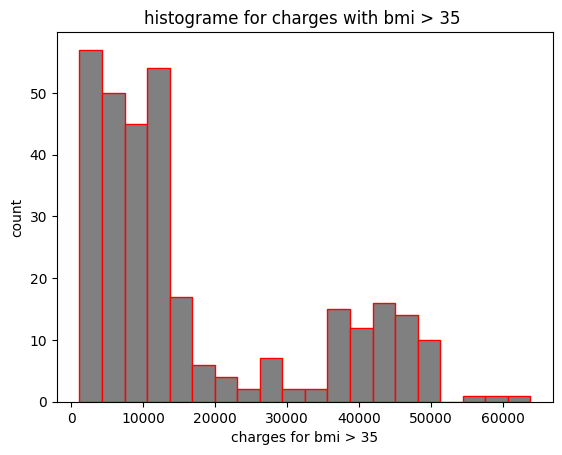

In [575]:
plt.hist(charges_m_bmi,bins=20,edgecolor="red",color="grey")
plt.xlabel("charges for bmi > 35")
plt.ylabel("count")
plt.title("histograme for charges with bmi > 35 ")
plt.show()


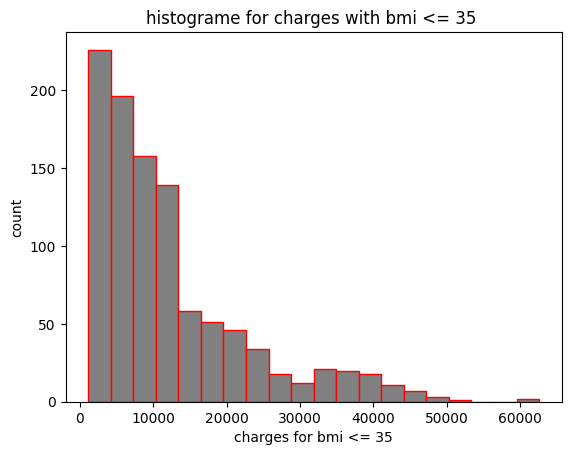

In [577]:
plt.hist(charges_l_bmi,bins=20,edgecolor="red" , color="grey")
plt.xlabel("charges for bmi <= 35")
plt.ylabel("count")
plt.title("histograme for charges with bmi <= 35 ")
plt.show()

### **Bivariate Analysis: smoker vs charges**

- How do charges differ between smokers and non-smokers?
- What is the average charge for smokers vs non-smokers?
- Do smokers consistently have much higher charges?
- Use box plots and bar plots to compare smokers vs non-smokers with charges.
- What percentage of smokers have charges above 20,000 compared to non-smokers?
- Do young smokers (e.g., age < 25 and smoker = yes) already show high charges?
- Among non-smokers, are there any cases with extremely high charges? If yes, why might that happen (e.g., BMI/age effect)?
- What is the maximum charge observed among smokers vs non-smokers?


In [369]:
df["smoker"].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

- the non smoker is more than the smoker

In [584]:
smoker_mean = df.groupby("smoker")["charges"].mean()
smoker_mean

C:\Users\omarh\AppData\Local\Temp\ipykernel_30860\3933531211.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  smoker_mean = df.groupby("smoker")["charges"].mean()


smoker
no      8440.660307
yes    32050.231832
Name: charges, dtype: float64

- so the avreag charges of the non smoker is 8440 and the smoker 322050

In [372]:
df.groupby("smoker")["charges"].describe()


C:\Users\omarh\AppData\Local\Temp\ipykernel_30860\3780376767.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("smoker")["charges"].describe()


,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1063.0,8440.660307,5992.973800,1121.8739,3988.883500,7345.72660,11363.019100,36910.60803
yes,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


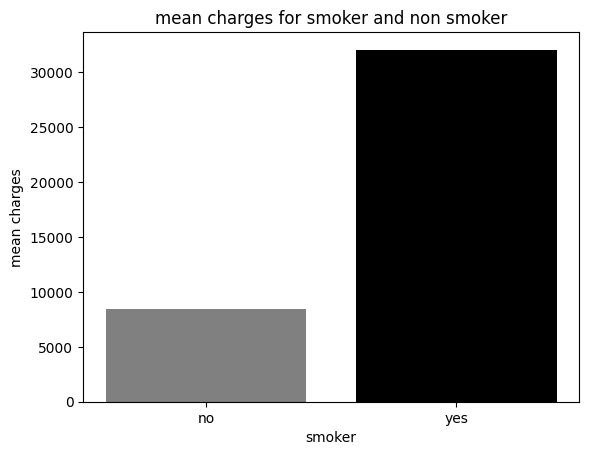

In [586]:
plt.bar(x=smoker_mean.index,height=smoker_mean.values,color=["grey","black"])
plt.xlabel("smoker")
plt.ylabel("mean charges")
plt.title("mean charges for smoker and non smoker")
plt.show()

C:\Users\omarh\AppData\Local\Temp\ipykernel_30860\3722047822.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x="smoker",y="charges",palette="grey",estimator=np.median)


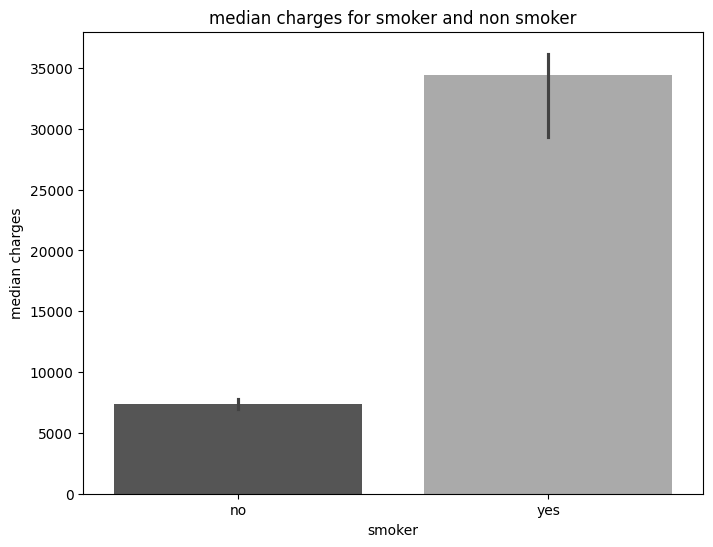

In [588]:
plt.figure(figsize=(8,6))
sns.barplot(data=df,x="smoker",y="charges",palette="grey",estimator=np.median)
plt.xlabel("smoker")
plt.ylabel("median charges")
plt.title("median charges for smoker and non smoker")
plt.show()

C:\Users\omarh\AppData\Local\Temp\ipykernel_30860\3339635562.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="smoker", y="charges",palette="grey")


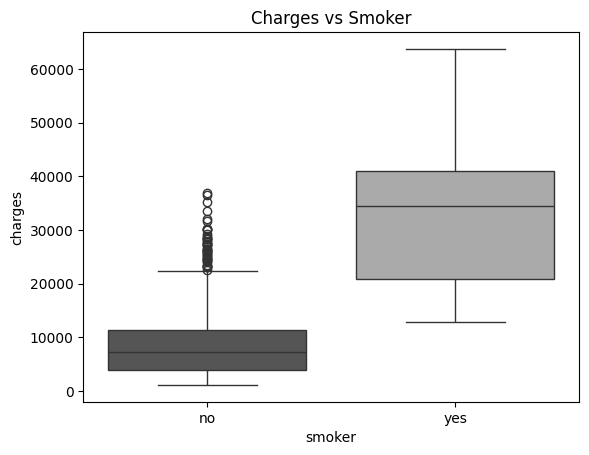

In [587]:
sns.boxplot(data=df, x="smoker", y="charges",palette="grey")
plt.title("Charges vs Smoker")
plt.show()


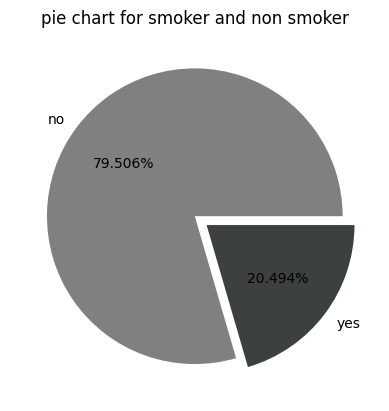

In [592]:
plt.pie(x=df["smoker"].value_counts().values , labels=df["smoker"].value_counts().index,autopct="%1.3f%%",colors=["grey","#3C4040"],explode=[0,.1])
plt.title("pie chart for smoker and non smoker")
plt.show()

In [375]:
charges_m_20000 = df.loc[(df["charges"] > 20000), :]["smoker"].value_counts(normalize=True)*100


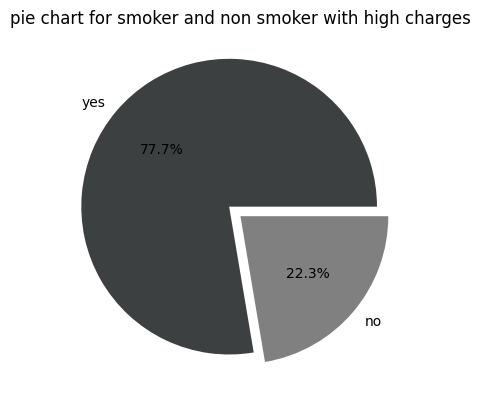

In [595]:
plt.pie(x=charges_m_20000.values , labels=charges_m_20000.index ,autopct="%1.1f%%",explode=[0.1,0],colors=["#3C4040","grey"])
plt.title("pie chart for smoker and non smoker with high charges")
plt.show()

In [377]:
young_smokers = df.loc[(df["age"] < 25) & (df["smoker"] == "yes"), "charges"]

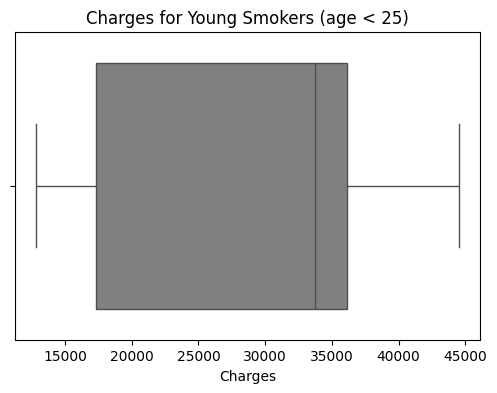

In [600]:

plt.figure(figsize=(6,4))
sns.boxplot(x=young_smokers , color="grey")
plt.title("Charges for Young Smokers (age < 25)")
plt.xlabel("Charges")
plt.show()


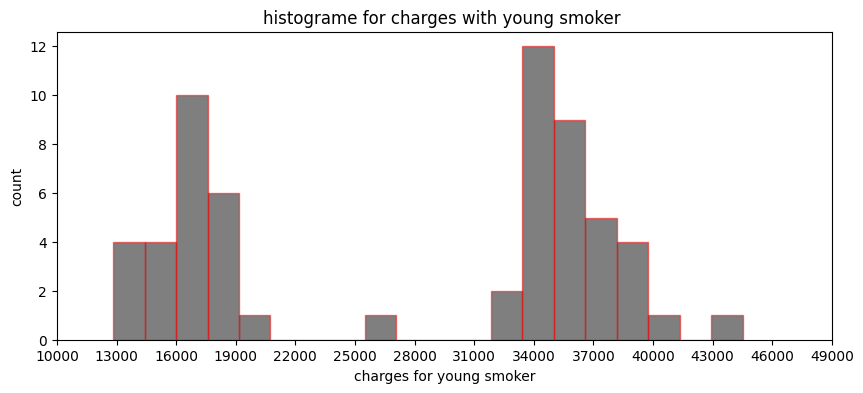

In [599]:
plt.figure(figsize=(10,4))
plt.hist(young_smokers,bins=20,edgecolor="red" , color="black" , alpha=.5)
plt.xlabel("charges for young smoker")
plt.ylabel("count")
plt.xticks(range(10000,50000,3000))
plt.title("histograme for charges with young smoker ")
plt.show()

- so the yong snoker have already hight charges

In [379]:
non_smoker_char = df.loc[(df["smoker"] == "no")]["charges"]
non_smoker_bmi = df.loc[(df["smoker"] == "no")]["bmi"]
non_smoker_age = df.loc[(df["smoker"] == "no")]["age"]

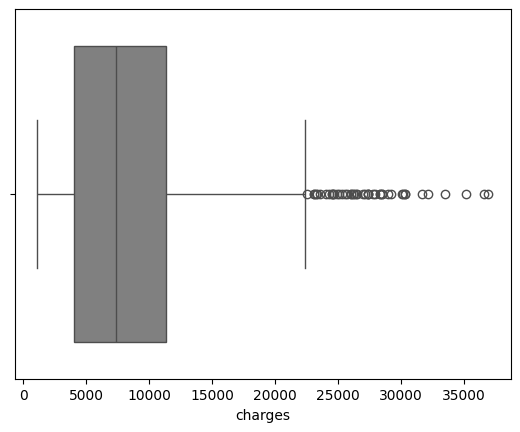

In [601]:
sns.boxplot(data=df , x=non_smoker_char , color="grey")
plt.show()

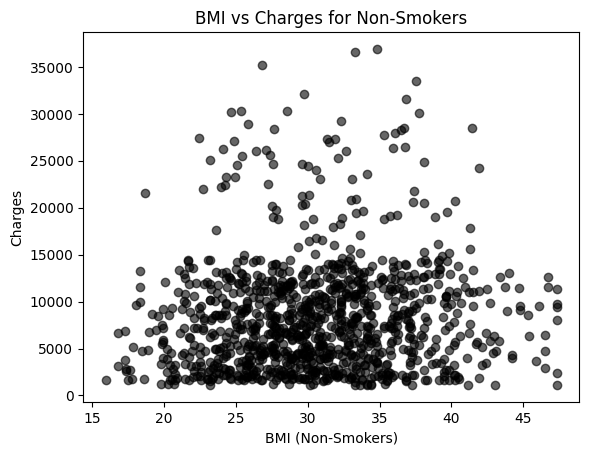

In [605]:
plt.scatter(non_smoker_bmi, non_smoker_char , color="black" , alpha=.6)
plt.xlabel("BMI (Non-Smokers)")
plt.ylabel("Charges")
plt.title("BMI vs Charges for Non-Smokers")
plt.show()


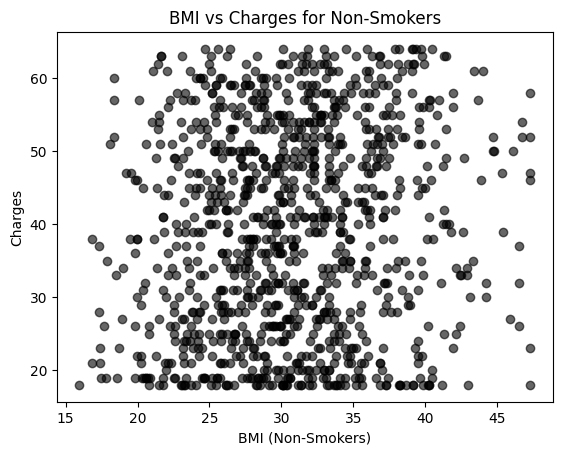

In [606]:
plt.scatter(non_smoker_bmi, non_smoker_age, color="black" , alpha=.6)
plt.xlabel("BMI (Non-Smokers)")
plt.ylabel("Charges")
plt.title("BMI vs Charges for Non-Smokers")
plt.show()


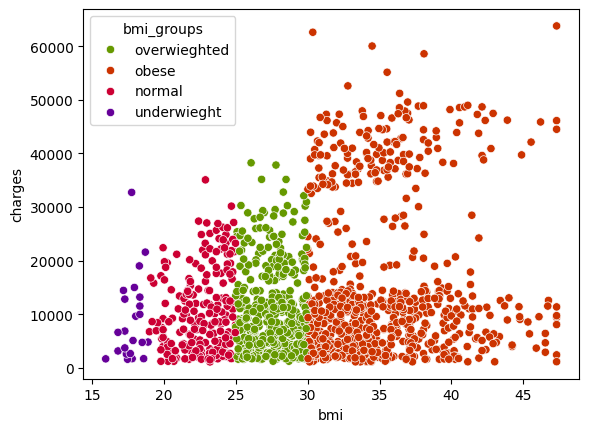

In [607]:
sns.scatterplot(data=df,x="bmi",y="charges",hue="bmi_groups" , palette="brg_r")
plt.show()

Text(0.5, 1.0, 'yong smokers charges')

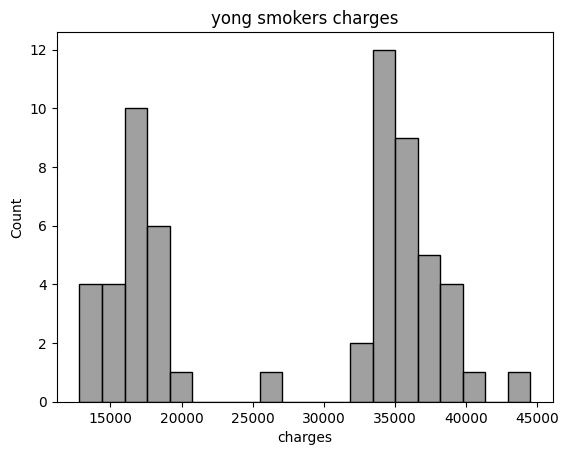

In [608]:
sns.histplot(df , x=young_smokers ,bins=20,color="grey")
plt.title("yong smokers charges")

<Figure size 800x800 with 0 Axes>

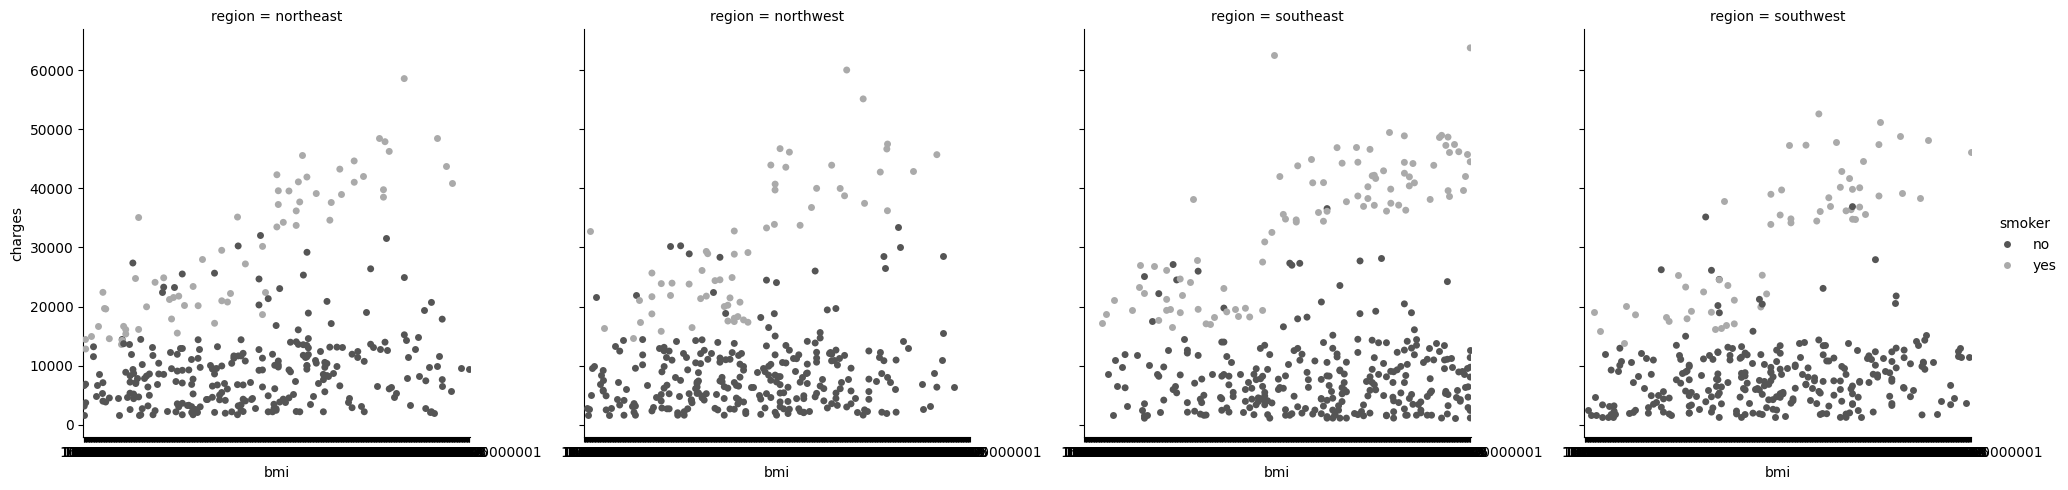

In [609]:
plt.figure(figsize=(8,8))
sns.catplot(df,x="bmi" , y="charges" , hue="smoker",kind="strip",col="region" , palette="grey")

- there is many non-smokers who hava already exteame charges that is because the bmi 

In [386]:
smoker_char = df.loc[(df["smoker"] == "yes")]["charges"]

print(non_smoker_char.max())
print(smoker_char.max())

36910.60803
63770.42801


- so the max charges of the non-smoker is 36910 and actully that is close to the mean of the normal smoker charges
and the max smoker has 63770 charges

### **Bivariate Analysis: children vs charges**

- Do people with more children pay higher or lower charges?
- Which children category has the highest average charges?
- Is there a clear relationship between number of children and charges?
- Use bar plots and box plots to show the trend.
- Do people with 0 children show higher charges compared to those with children?
- For families with 3+ children, are charges always high or still varied?
- Among high charges cases (> 25,000), how many children do people usually have?


In [387]:
children_mean = df.groupby("children")["charges"].mean()

C:\Users\omarh\AppData\Local\Temp\ipykernel_30860\1094075178.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  children_mean = df.groupby("children")["charges"].mean()


C:\Users\omarh\AppData\Local\Temp\ipykernel_30860\4241321316.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x="children",y="charges",palette="grey",estimator=np.mean)


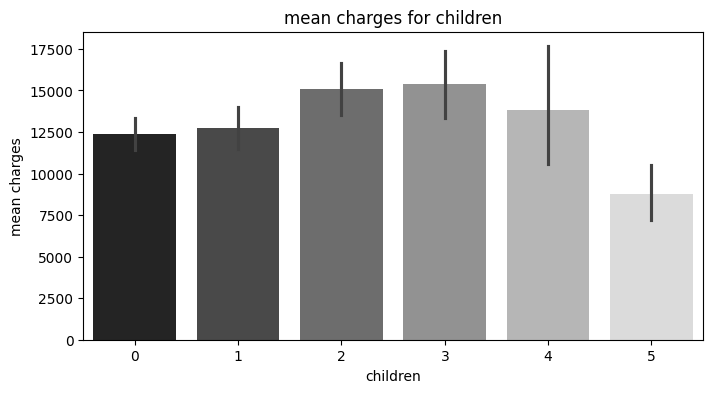

In [611]:
plt.figure(figsize=(8,4))
sns.barplot(data=df,x="children",y="charges",palette="grey",estimator=np.mean)
plt.xlabel("children")
plt.ylabel("mean charges")
plt.title("mean charges for children")
plt.show()

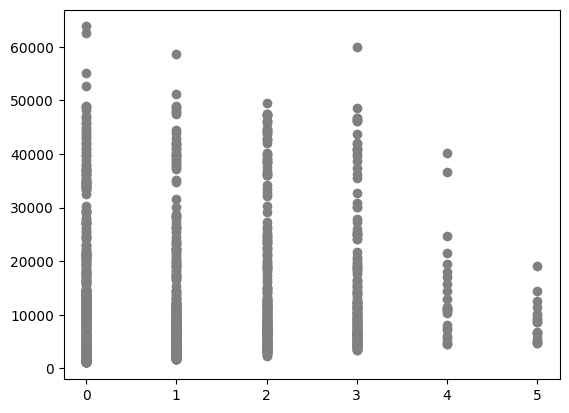

In [612]:
plt.scatter(x=df["children"] , y=df["charges"] , color="grey")

C:\Users\omarh\AppData\Local\Temp\ipykernel_30860\323168008.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x="children",y="charges" , palette="grey")


<Axes: xlabel='children', ylabel='charges'>

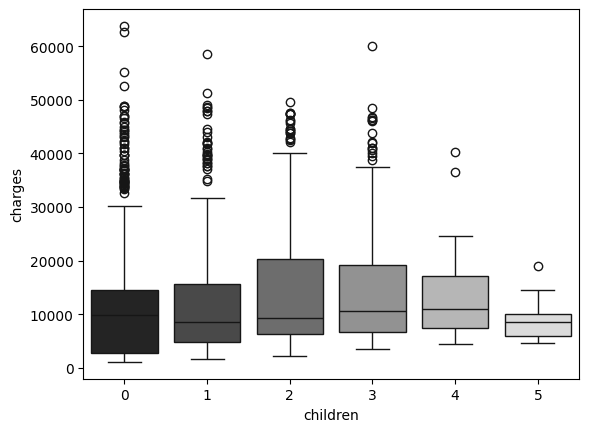

In [613]:
sns.boxplot(data=df,x="children",y="charges" , palette="grey")

<BarContainer object of 1337 artists>

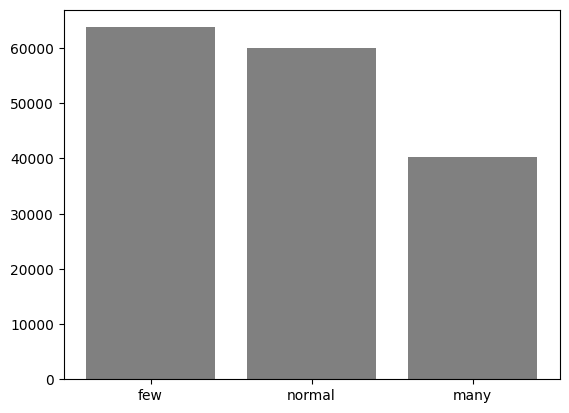

In [615]:
plt.bar(x=df["children_groups"], height=df["charges"],color="grey")

C:\Users\omarh\AppData\Local\Temp\ipykernel_30860\3668515852.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  children_m = df.groupby("children")["charges"].mean()


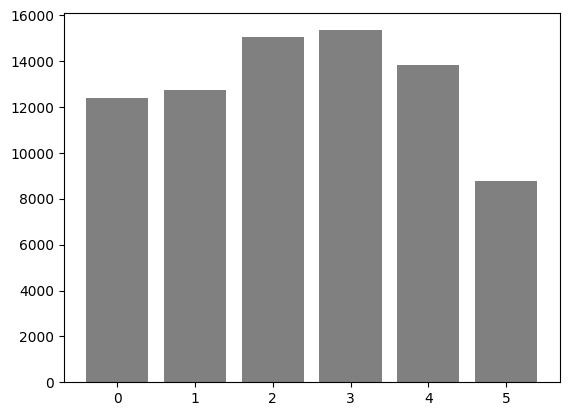

In [616]:
children_m = df.groupby("children")["charges"].mean()
plt.bar(x=children_m.index , height=children_m.values , color="grey")
plt.show()

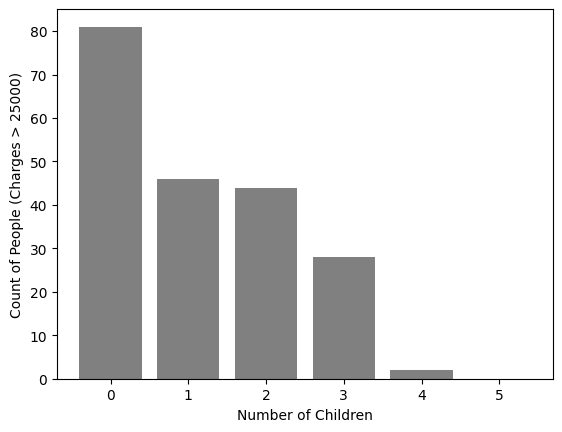

In [617]:
high_charges = df.loc[df["charges"] > 25000, "children"].value_counts()
plt.bar(x=high_charges.index, height=high_charges.values ,color="grey")
plt.xlabel("Number of Children")
plt.ylabel("Count of People (Charges > 25000)")
plt.show()


- most  of the high charges have not many children

### **Bivariate Analysis: region vs charges**

- Do certain regions have higher average insurance charges than others?
- Which region has the highest mean charges?
- Are charges evenly distributed across the four regions?
- Create bar plots or box plots to visualize the differences.
- For high charges cases (e.g., > 25,000), which region do most people come from?
- Do some regions have more smokers, and does that affect average charges?
- Compare the variation (spread) of charges in each region — which region has the largest spread?
- Is there a region where charges are consistently lower, regardless of other factors?


In [618]:
region_char = df.groupby("region")["charges"].mean().sort_index()

C:\Users\omarh\AppData\Local\Temp\ipykernel_30860\1371746969.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_char = df.groupby("region")["charges"].mean().sort_index()


In [619]:
region_char

region
northeast    13406.384516
northwest    12450.840844
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

C:\Users\omarh\AppData\Local\Temp\ipykernel_30860\1918120153.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x="region",y="charges",palette="grey",estimator=np.mean)


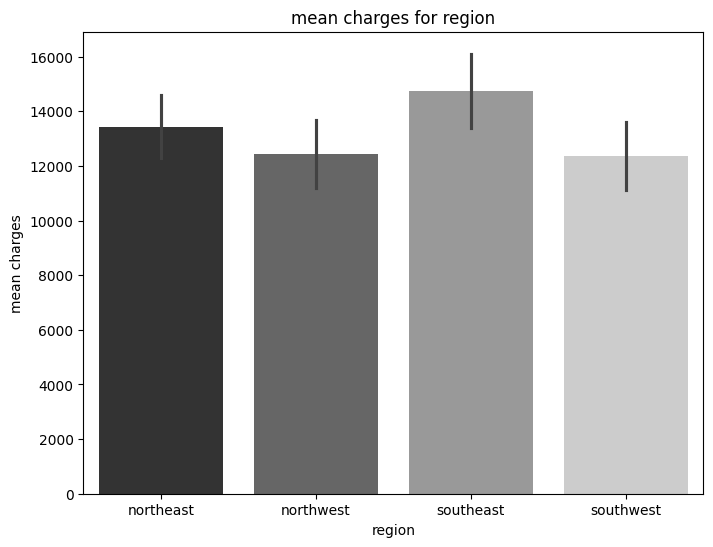

In [620]:
plt.figure(figsize=(8,6))
sns.barplot(data=df,x="region",y="charges",palette="grey",estimator=np.mean)
plt.xlabel("region")
plt.ylabel("mean charges")
plt.title("mean charges for region")
plt.show()

- so all of them is close to each other but the southest is the most

C:\Users\omarh\AppData\Local\Temp\ipykernel_30860\3346700425.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x="region",y="charges",palette="grey")


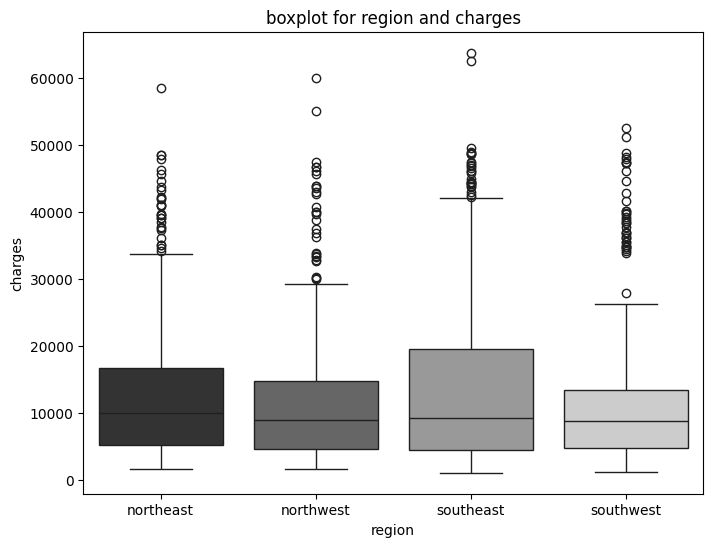

In [622]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df,x="region",y="charges",palette="grey")
plt.xlabel("region")
plt.ylabel("charges")
plt.title("boxplot for region and charges")
plt.show()

In [398]:
df["region"].unique()

['southwest', 'southeast', 'northwest', 'northeast']
Categories (4, object): ['northeast', 'northwest', 'southeast', 'southwest']

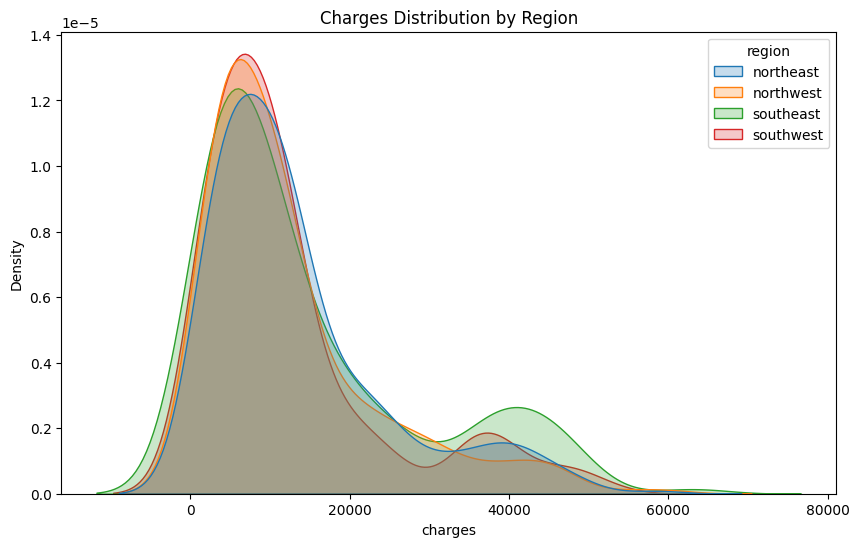

In [399]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x="charges", hue="region", fill=True )
plt.title("Charges Distribution by Region")
plt.show()


- all of them folww normal distripution

In [400]:
char_m_25000 = df.loc[(df["charges"] > 25000)]

In [401]:
char_m_25000["region"].value_counts()

region
southeast    74
northeast    44
southwest    42
northwest    41
Name: count, dtype: int64

C:\Users\omarh\AppData\Local\Temp\ipykernel_30860\4248519859.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=char_m_25000,x="region",palette="grey")


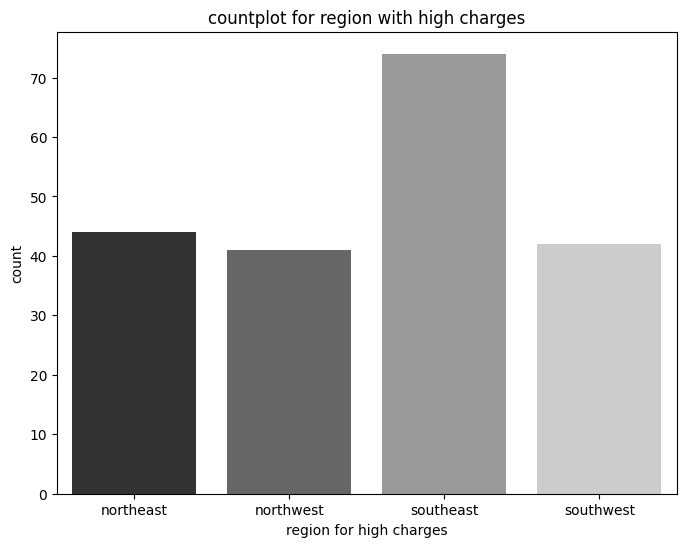

In [624]:
plt.figure(figsize=(8,6))
sns.countplot(data=char_m_25000,x="region",palette="grey")
plt.xlabel("region for high charges")
plt.ylabel("count")
plt.title("countplot for region with high charges")
plt.show()

- many of them come from the southeast    

In [402]:
region_smokers = df.loc[(df["smoker"] == "yes")]

In [403]:
region_smokers["region"].value_counts()

region
southeast    91
northeast    67
northwest    58
southwest    58
Name: count, dtype: int64

- the most region that have smokers is the southest  

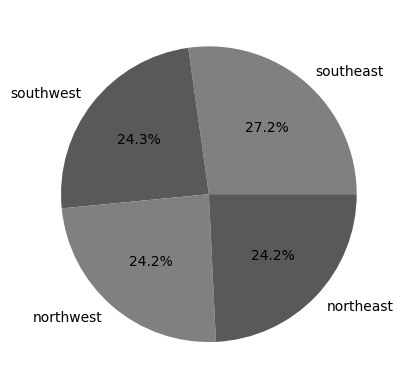

In [626]:
regions = df["region"].value_counts()

plt.pie(x=regions.values , labels=regions.index ,autopct="%1.1f%%",colors=["grey","#595959"] )
plt.show()

- allof then is close to each other but also the ,ost one is the souteast

### **Bivariate Analysis: sex vs charges**

- Do males and females have similar or different average charges?
- Which gender has higher medical expenses on average?
- Are there outliers in one gender group more than the other?
- Use box plots to compare charges between male and female.
- Among high charges cases (e.g., > 30,000), which gender dominates?
- Do young females (age < 25) vs young males show similar charge patterns?
- Is the difference between male and female charges significant, or is it minor compared to other features like smoking?
- Does one gender show more variation (spread) in charges than the other?


In [627]:
sex_char = df.groupby("gender")["charges"].mean()
sex_char

C:\Users\omarh\AppData\Local\Temp\ipykernel_30860\1818896601.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sex_char = df.groupby("gender")["charges"].mean()


gender
female    12569.578844
male      13974.998864
Name: charges, dtype: float64

C:\Users\omarh\AppData\Local\Temp\ipykernel_30860\3876542515.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x="gender",y="charges",palette="grey",estimator=np.mean)


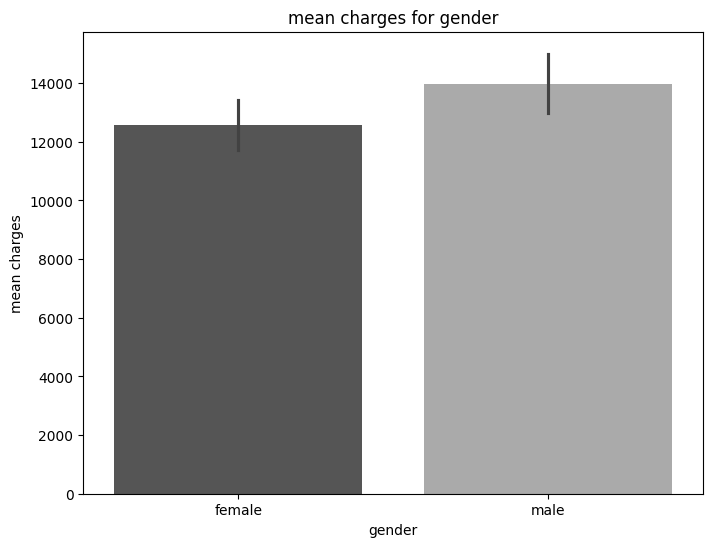

In [628]:
plt.figure(figsize=(8,6))
sns.barplot(data=df,x="gender",y="charges",palette="grey",estimator=np.mean)
plt.xlabel("gender")
plt.ylabel("mean charges")
plt.title("mean charges for gender")
plt.show()

C:\Users\omarh\AppData\Local\Temp\ipykernel_30860\3838057580.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x="gender",y="charges",palette="grey")


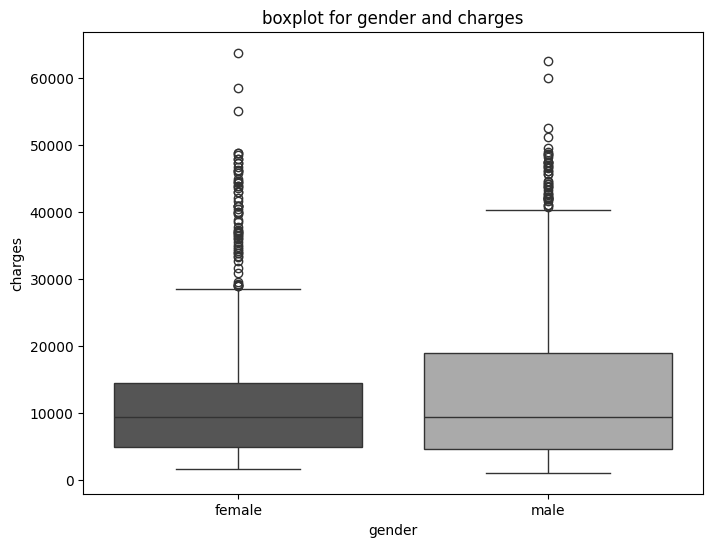

In [629]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df,x="gender",y="charges",palette="grey")
plt.xlabel("gender")
plt.ylabel("charges")
plt.title("boxplot for gender and charges")
plt.show()

- not a big difrrins between them

In [407]:
midecal_s = df[(df["smoker"] == "yes") & (df["bmi"] > 35)].groupby("gender")["charges"].mean()


C:\Users\omarh\AppData\Local\Temp\ipykernel_30860\1685395608.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  midecal_s = df[(df["smoker"] == "yes") & (df["bmi"] > 35)].groupby("gender")["charges"].mean()


In [408]:
midecal_s

gender
female    45452.960240
male      42525.666233
Name: charges, dtype: float64

- also close to each other

- the male group have higer meen

C:\Users\omarh\AppData\Local\Temp\ipykernel_30860\3808683797.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=char_m_30000,x="gender",palette="grey")


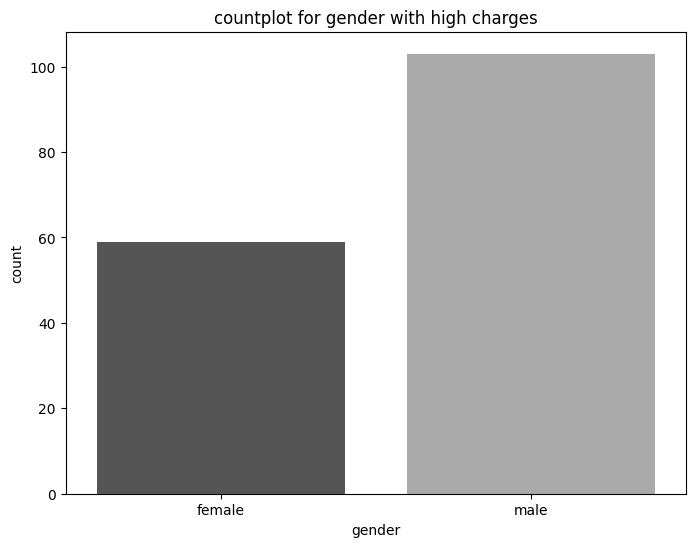

In [640]:
char_m_30000 = df[df["charges"] > 30000]


plt.figure(figsize=(8,6))
sns.countplot(data=char_m_30000,x="gender",palette="grey")
plt.xlabel("gender")
plt.ylabel("count")
plt.title("countplot for gender with high charges")
plt.show()


- they are close to each other

In [642]:
age_m_25 = df[df["age"] > 25]
age_m_25.groupby("gender")["charges"].mean()

C:\Users\omarh\AppData\Local\Temp\ipykernel_30860\303965992.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_m_25.groupby("gender")["charges"].mean()


gender
female    13710.142694
male      15308.461637
Name: charges, dtype: float64

C:\Users\omarh\AppData\Local\Temp\ipykernel_30860\3528164652.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=age_m_25,x="gender",palette="grey")


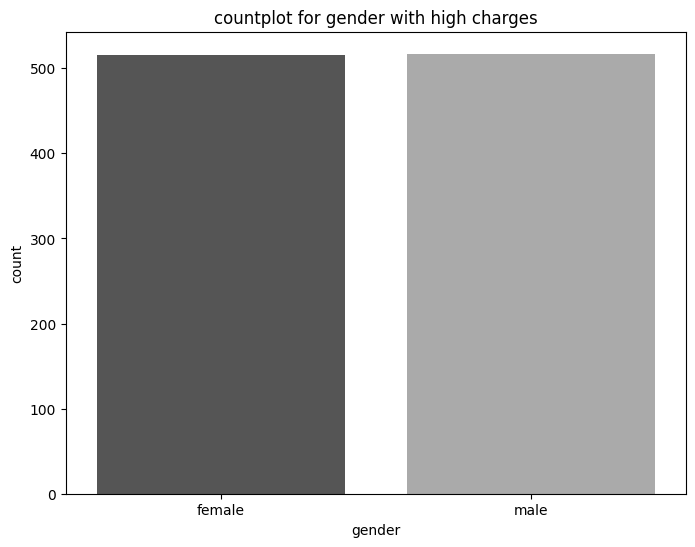

In [643]:
plt.figure(figsize=(8,6))
sns.countplot(data=age_m_25,x="gender",palette="grey")
plt.xlabel("gender")
plt.ylabel("count")
plt.title("countplot for gender with high charges")
plt.show()

-so it close to each other

In [412]:
print(df.groupby(["smoker","gender"])["charges"].median())

smoker  gender
no      female     7639.417450
        male       6986.101975
yes     female    28950.469200
        male      36085.219000
Name: charges, dtype: float64


C:\Users\omarh\AppData\Local\Temp\ipykernel_30860\856232194.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(["smoker","gender"])["charges"].median())


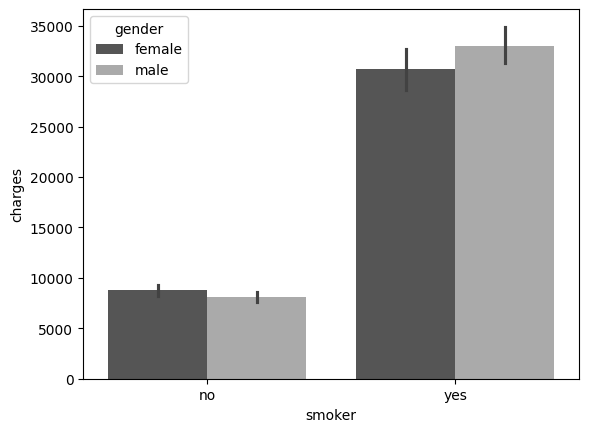

In [644]:
sns.barplot(data=df , x ="smoker" ,y="charges",hue="gender" , palette="grey")
plt.show()

----
----
----

## 📊 Bivariate Analysis (Non-Charges Focused)
#### 1. Does the average age differ across regions?

- Plot: Boxplot or Barplot

- Possible Insight: Some regions might have younger or older populations, which could later explain health patterns.

#### 2. Is there a difference in BMI distribution between males and females?

- Plot: Histogram or KDE Plot (split by gender)

- Possible Insight: Could reveal whether obesity trends are different between men and women.

#### 3. Is there a relationship between smoking status and the number of children?

- Plot: Barplot (children on x-axis, smoker as hue)

- Possible Insight: We might find that smokers tend to have fewer or more children.

#### 4. Does the region affect the proportion of smokers?

- Plot: Countplot with hue.

- Possible Insight: Identify regions with higher smoking prevalence, which could later be linked to charges.


----------------------

### 🔺 Multivariate Analysis

#### 1. Smoking, Age, and Charges

- Among smokers, how do insurance charges differ between younger and older individuals? catplot on sns with hue , col, rows splitters and kind="count"

- Does age amplify the effect of smoking on charges?

- Compare charges by age groups within smoking status.

- scatter plot with hue 

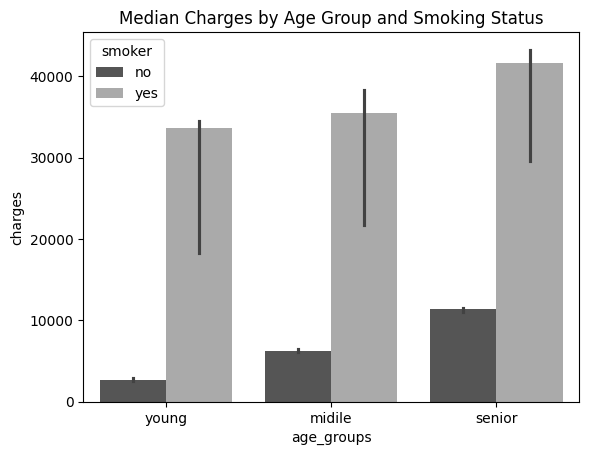

In [649]:
sns.barplot(
    data=df,
    x="age_groups",
    y="charges",
    hue="smoker",
    palette="grey",
    estimator=np.median
)
plt.title("Median Charges by Age Group and Smoking Status")
plt.show()


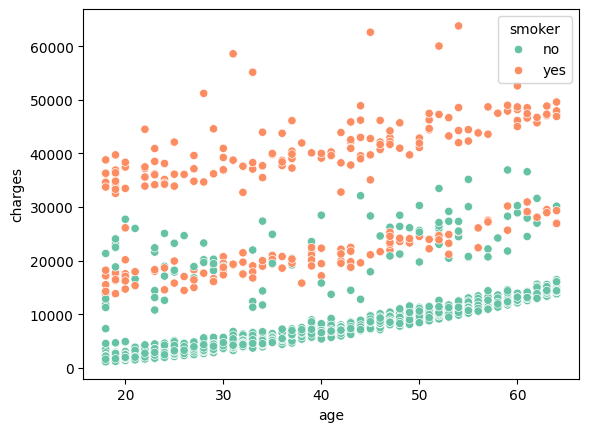

In [652]:
sns.scatterplot(data=df , x="age" , y="charges" , hue="smoker" , palette="Set2")
plt.show()

#### 2. Age Group, BMI , and Charges

- After categorizing age (young, middle-aged, senior) and BMI (normal, overweight, obese), which combinations are associated with higher charges? barplot with hue

- Are there specific age-BMI groups that stand out with unusually high costs?

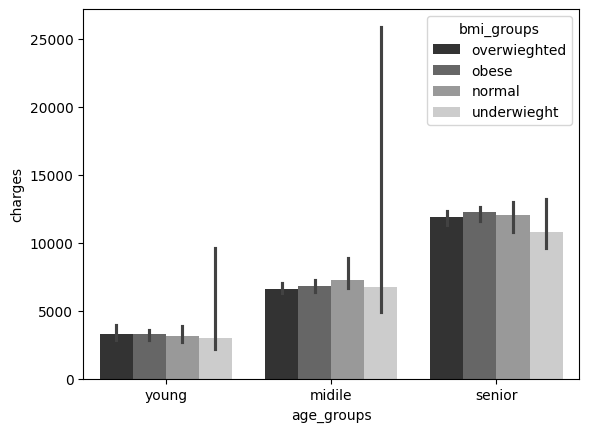

In [653]:
sns.barplot(data=df , x="age_groups" , y="charges" , hue="bmi_groups", palette="grey" , estimator=np.median)
plt.show()

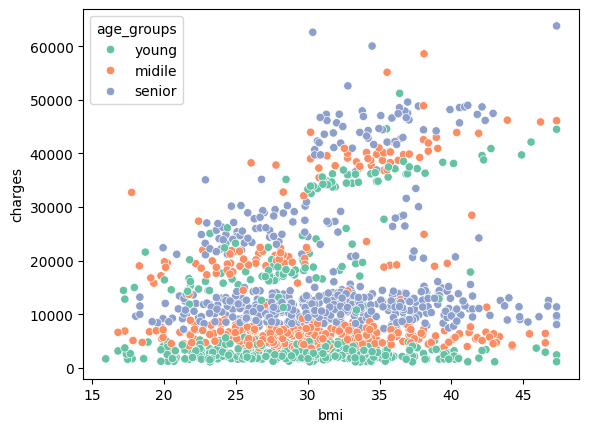

In [415]:
sns.scatterplot(data=df , x="bmi" , y="charges" , hue="age_groups" , palette="Set2")
plt.show()

#### 3. Sex, BMI, and Charges

- How do insurance charges vary with BMI for males vs females?

- Create a scatter plot of BMI vs Charges with hue="sex".

<Figure size 1500x1000 with 0 Axes>

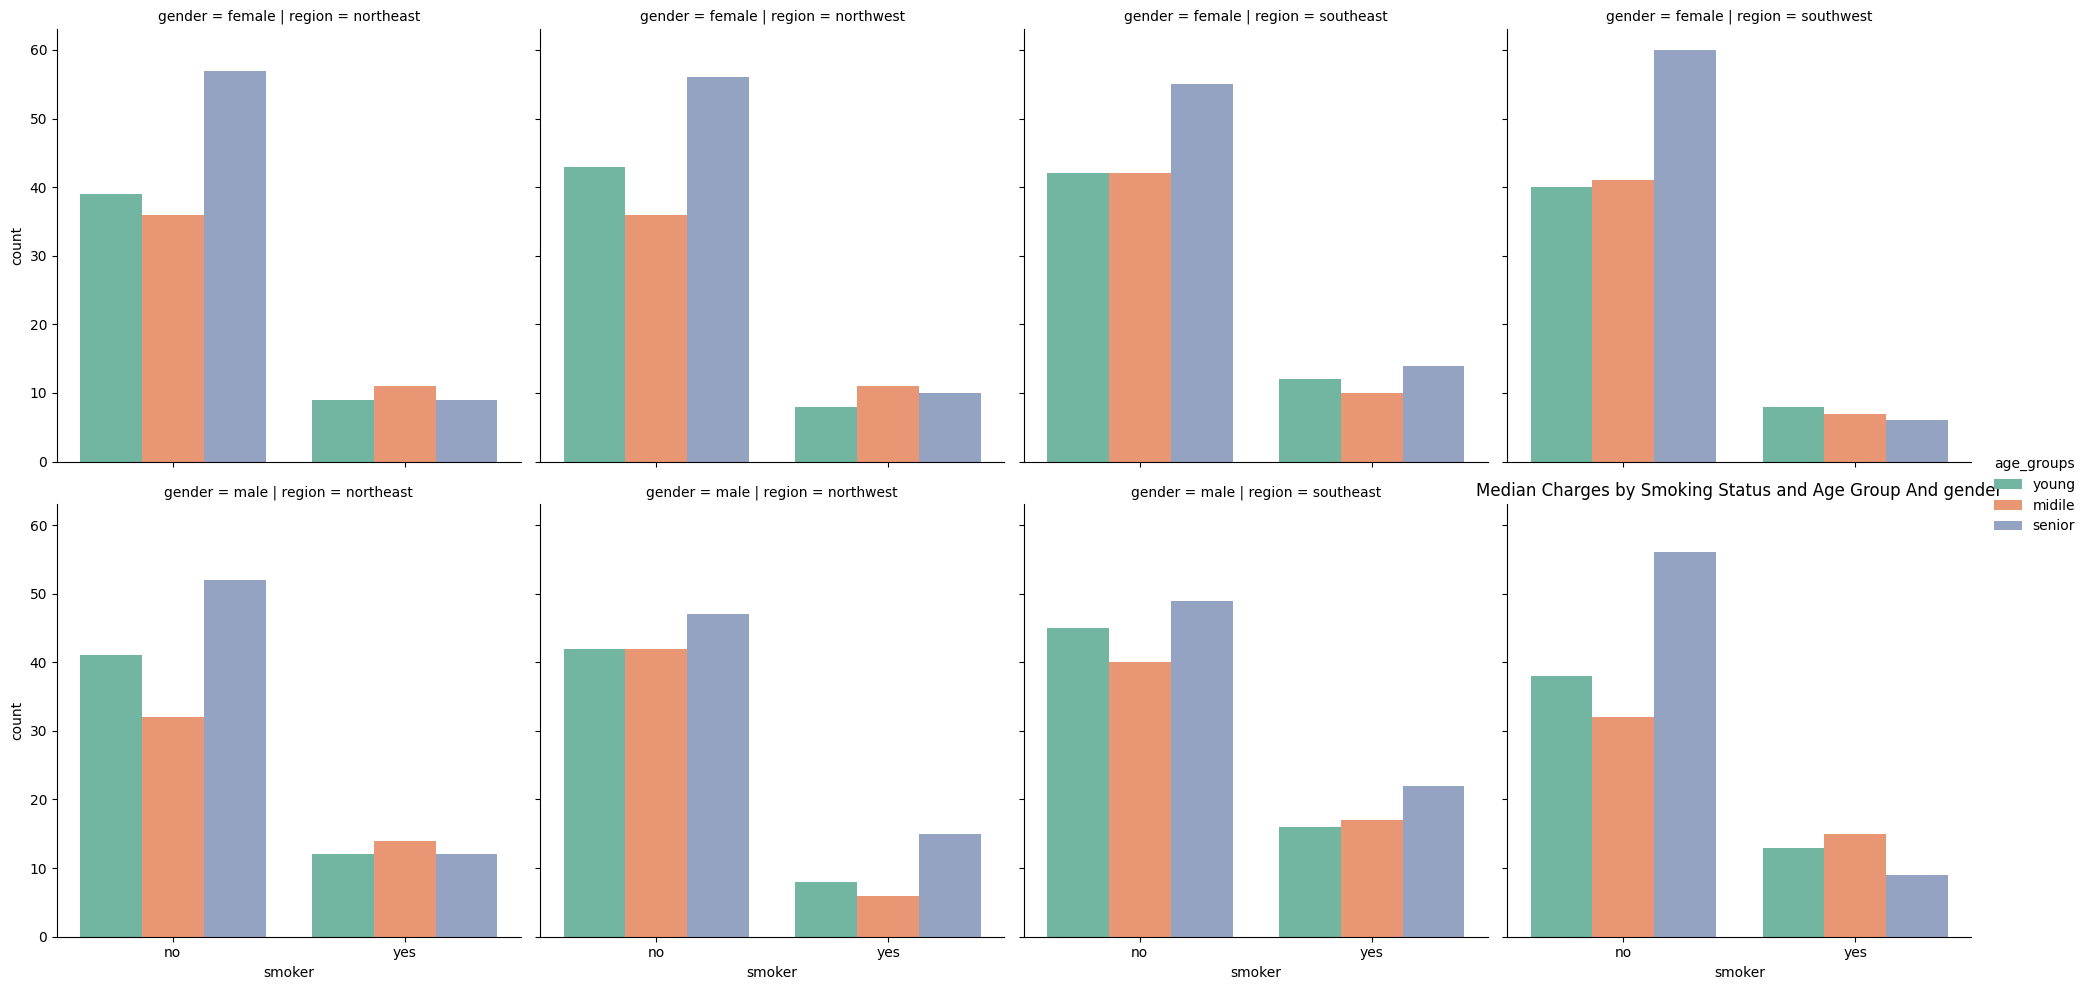

In [654]:
plt.figure(figsize=(15,10))
sns.catplot(data=df, x="smoker", hue="age_groups",row="gender",col="region", kind="count", palette="Set2")
plt.title("Median Charges by Smoking Status and Age Group And gender")
plt.show()


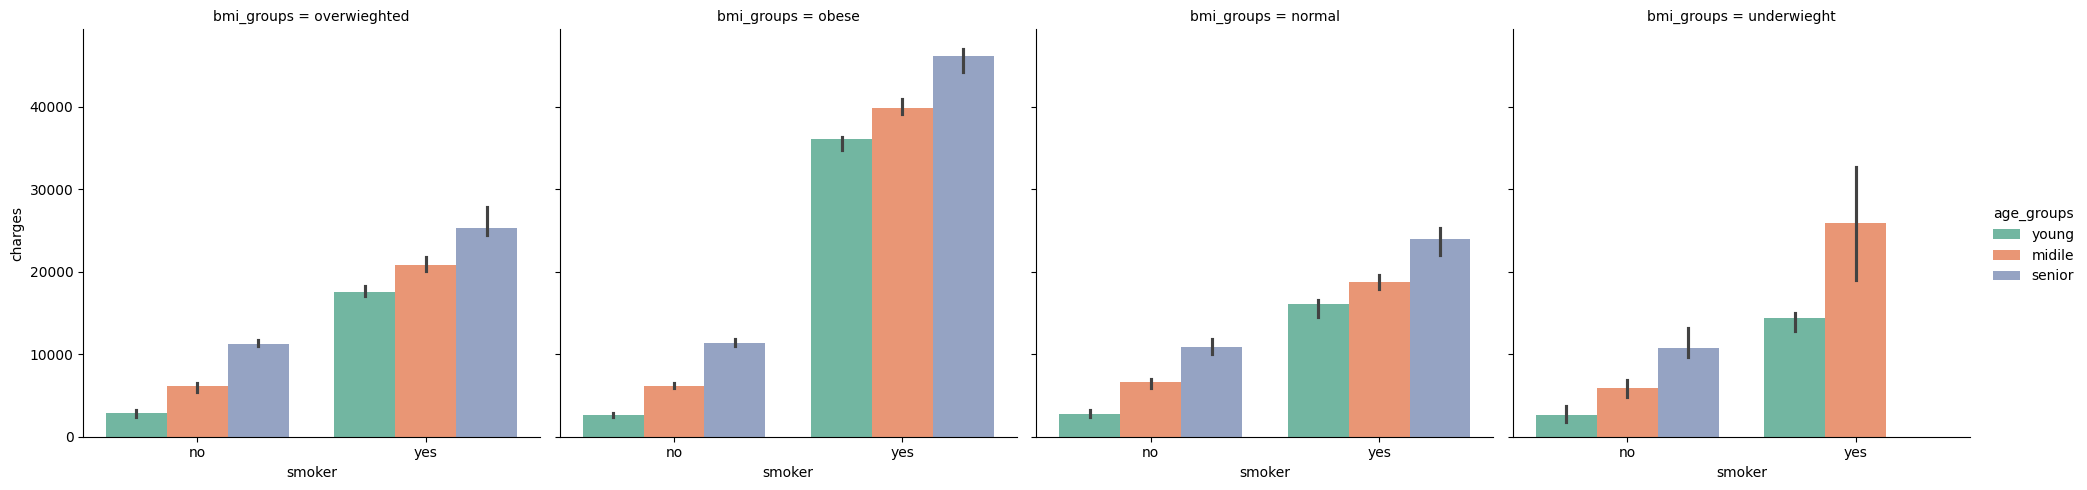

In [417]:
sns.catplot(data=df , x="smoker" , y="charges",hue="age_groups" ,estimator=np.median,palette="Set2" ,col="bmi_groups" ,kind="bar")

In [418]:
df.corr(numeric_only=True)

,age,bmi,charges
age,1.000000,0.111998,0.298308
bmi,0.111998,1.000000,0.199063
charges,0.298308,0.199063,1.000000


<Axes: >

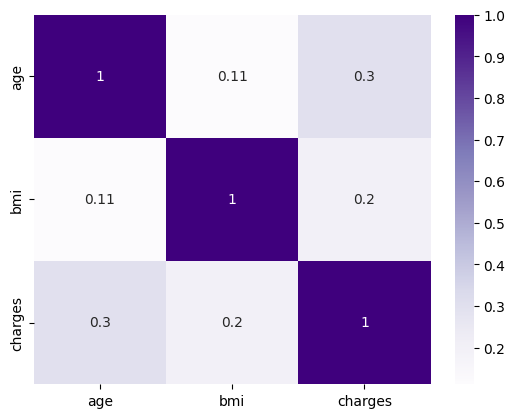

In [656]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="Purples")

### **Stop Here and Provide Insights**

Now stop the coding and give me your **overall insights** about the problem:  
- Summarize the key findings from the univariate, bivariate, and multivariate analysis.  
- Highlight the most important factors that seem to influence insurance charges.  
- Mention any unusual patterns, outliers, or trends you discovered.   
- Suggest which features might be the most relevant for building a predictive model for charges.  


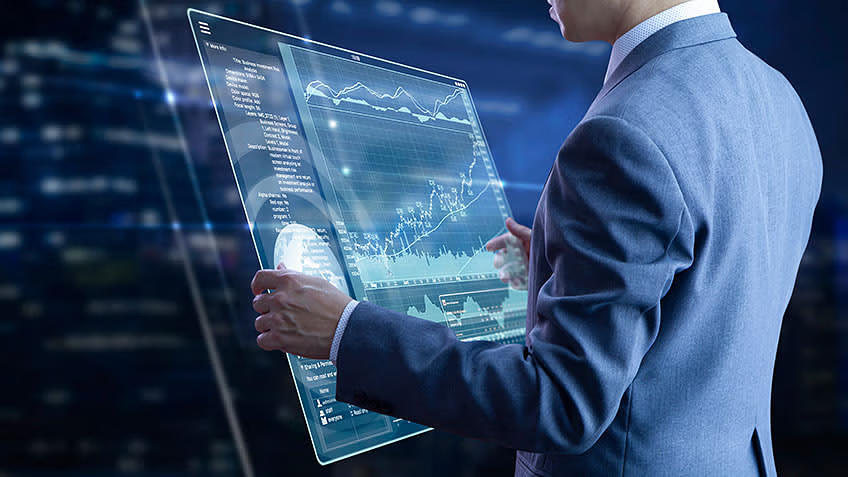

-- so after the virtualization that we did and the analyis we have many important insights